Приготовления для вывода графиков:

In [1]:
# embeds plots drawed by matplotlib inside the Notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2    
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 8  # Устанавливаем значение по умолчанию для размера изображения
import draw as dr # вспомогательный модуль для рисования графиков.
#dr.plt.style.use('bmh')
dr.plt.style.use('ggplot')

from os.path import join as join_path
results_dir = '../results'

## 0.Utils

In [2]:
def median_by_trial(paths, number_of_envs=10, runs_in_one_env=10): 
    """вычисляет медиану длинны пути для всех запусков алгоритма в одной среде"""
    runs = runs_in_one_env
    return [dr.np.median(paths[runs*i:(runs*(i+1))],axis=0) for i in xrange(number_of_envs)]  


def average_of_medians(paths):
    return dr.np.average(median_by_trial(paths), axis=0)
    
average_median = average_of_medians

# графики среднего значения слишком скакали, поэтому для понятности пришлось немного сгладить.
def last_n_averages(values, n): 
    l =[]
    for i in xrange(0, len(values)):
        part = values[max(0, i + 1 - n): i + 1]
        l.append(sum(part) / float(len(part)))
    return l

def last_n_average_over_median_average(paths, n): 
    return last_n_averages(average_median(paths), n)

aa = last_n_average_over_median_average

**График кривой обучения(зависимость числа шагов до цели от числа испытаний алгоритма в среде):**

In [3]:
def vizualize_results(folder_with_results, **kwargs): #ylim=None):
    ql_01_09_01 = []
    ql_01_09_001 = []
    ql_001_099_001 = []
    random_search = []
    fs_learning = []

    # загружаем результаты испытаний
    folder = folder_with_results
    for i in xrange(1, 11):
        random_search.extend(dr.get_json_data(folder+"/rnd_paths_{0}.json".format(i)))
        fs_learning.extend(dr.get_json_data(folder+"/all_paths_{0}.json".format(i)))
        ql_01_09_01.extend(dr.get_json_data(
                    folder+"/q-learning_(0.1,0.9, 0.1)_{0}.json".format(i)))
        ql_01_09_001.extend(dr.get_json_data(
                    folder+"/q-learning_(0.1,0.9, 0.01)_{0}.json".format(i)))
        ql_001_099_001.extend(dr.get_json_data(
                    folder+"/q-learning_(0.01,0.99, 0.01)_{0}.json".format(i)))
        
            
    last_n = 10 # усреднение по последним n значениям внутри одного графика(для сглаживания)

    fig = dr.plt.figure(1) 
    ax = fig.add_subplot(111, **kwargs) 
    #if ylim:
    #    ax.set_ylim(*ylim)
    h2l = [] # handels to labels for the legend of the plot

    handle, = ax.plot(aa(ql_01_09_01, last_n), color = dr.plt.cm.prism(4))
    h2l.append((handle, "q-learning(0.1,0.9,0.1)"))
    
    handle, = ax.plot(aa(ql_01_09_001, last_n), color = dr.plt.cm.prism(8))
    h2l.append((handle, "q-learning(0.1,0.9,0.01)"))
    
    handle, = ax.plot(aa(ql_001_099_001, last_n), color = dr.plt.cm.prism(12))
    h2l.append((handle, "q-learning(0.01,0.99,0.01)"))
    
    handle, = ax.plot(aa(random_search, last_n), color = "black", lw=4.0)
    h2l.append((handle, "random_search"))
    handle, = ax.plot(aa(fs_learning, last_n), color = "red", lw=4.0)
    h2l.append((handle, "fs"))    
    

    h, l = zip(*h2l)
    fig.legend(handles=h, labels=l, loc='upper center', shadow=1, ncol=6)
    #dr.plt.title("Environment: {0}".format(env_type))
    dr.plt.show()    

**Каждая точка на сделующем графике представляет собой один запуск обучения алгоритма в среде **
 - x координата = среднее число шагов до цели за первые десять эпизодов
 - y координата = среднее число за последние 10 эпизодов.

In [4]:
def load_results(result_files_template, file_indices):
    results = []
    for i in file_indices:
        results.extend(dr.get_json_data(result_files_template.format(i)))
        
    results = dr.np.array(results) #dr.np.clip(dr.np.array(results),0,2000)    
    return results  

def vizualize_first10_vs_last10_fs_and_rl(small_envs_results, middle_envs_results, big_envs_results):
    fs_small = load_results(small_envs_results + "/all_paths_{0}.json", xrange(1, 11))
    fs_small_10first = dr.np.average(fs_small[:,:10], axis=1)
    fs_small_10last = dr.np.average(fs_small[:,-10:], axis=1)
    
    fs_middle = load_results(middle_envs_results + "/all_paths_{0}.json", xrange(1, 11))
    fs_middle_10first = dr.np.average(fs_middle[:,:10], axis=1)
    fs_middle_10last = dr.np.average(fs_middle[:,-10:], axis=1)
    
    fs_big = load_results(big_envs_results + "/all_paths_{0}.json", xrange(1, 11))
    fs_big_10first = dr.np.average(fs_big[:,:10], axis=1)
    fs_big_10last = dr.np.average(fs_big[:,-10:], axis=1)
    
    #/лучшие результаты у: q-learning_(0.1,0.9, 0.1) 
    rl_small = load_results(small_envs_results + "/q-learning_(0.1,0.9, 0.1)_{0}.json", xrange(1, 11))
    rl_small_10first = dr.np.average(rl_small[:,:10], axis=1)
    rl_small_10last = dr.np.average(rl_small[:,-10:], axis=1)
    
    rl_middle = load_results(middle_envs_results + "/q-learning_(0.1,0.9, 0.1)_{0}.json", xrange(1, 11))
    rl_middle_10first = dr.np.average(rl_middle[:,:10], axis=1)
    rl_middle_10last = dr.np.average(rl_middle[:,-10:], axis=1)
    
    rl_big = load_results(big_envs_results + "/q-learning_(0.1,0.9, 0.1)_{0}.json", xrange(1, 11))
    rl_big_10first = dr.np.average(rl_big[:,:10], axis=1)
    rl_big_10last = dr.np.average(rl_big[:,-10:], axis=1)
    
    
    fig, ax = dr.plt.subplots(ncols=1) #figsize=(10, 5))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
                    wspace=0.2)
    ax.set_ylabel('average steps for the 10 last trials')
    ax.set_xlabel('average steps for the 10 first trials')
    #ax.set_title('A', loc='left', fontsize=24)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim(1,10000)
    ax.set_ylim(1,10000)
    ax.plot(dr.np.linspace(1,10000),dr.np.linspace(1,10000),'--', lw=2)

    for i in range(0, 10):
        # fs middle
        ax.scatter(fs_middle_10first[i*10:(i+1)*10],
                   fs_middle_10last[i*10:(i+1)*10], s=15, 
                   alpha = 0.3, marker = 'o', lw= 1, color = 'b')
                   #color=dr.plt.cm.gist_rainbow(int(i*25.5)))
        ax.errorbar(dr.np.average(fs_middle_10first[i*10:(i+1)*10]),
                   dr.np.average(fs_middle_10last[i*10:(i+1)*10]),
                   xerr=dr.np.std(fs_middle_10first[i*10:(i+1)*10]),
                   yerr=dr.np.std(fs_middle_10last[i*10:(i+1)*10]),
                   alpha = 0.9, elinewidth = 1, color = 'b',
                   #color=dr.plt.cm.gist_rainbow(int(i*25.5)),
                   marker='o', ms=7, capsize = 6, capthick = 1)
        # fs small
        ax.scatter(fs_small_10first[i*10:(i+1)*10],
                   fs_small_10last[i*10:(i+1)*10], s=15, 
                   alpha = 0.3, marker = 'o', lw= 1, color = 'b')
                   #color=dr.plt.cm.gist_rainbow(int(i*25.5)))
        ax.errorbar(dr.np.average(fs_small_10first[i*10:(i+1)*10]),
                   dr.np.average(fs_small_10last[i*10:(i+1)*10]),
                   xerr=dr.np.std(fs_small_10first[i*10:(i+1)*10]),
                   yerr=dr.np.std(fs_small_10last[i*10:(i+1)*10]),
                   alpha = 0.9, elinewidth = 1, color = 'b',
                   #color=dr.plt.cm.gist_rainbow(int(i*25.5)),
                   marker='o', ms=7, capsize = 6, capthick = 1)
        #fs big fs_big_10last
        ax.scatter(fs_big_10first[i*10:(i+1)*10],
                   fs_big_10last[i*10:(i+1)*10], s=15, 
                   alpha = 0.3, marker = 'o', lw= 1, color = 'b')
                   #color=dr.plt.cm.gist_rainbow(int(i*25.5)))
        ax.errorbar(dr.np.average(fs_big_10first[i*10:(i+1)*10]),
                   dr.np.average(fs_big_10last[i*10:(i+1)*10]),
                   xerr=dr.np.std(fs_big_10first[i*10:(i+1)*10]),
                   yerr=dr.np.std(fs_big_10last[i*10:(i+1)*10]),
                   alpha = 0.9, elinewidth = 1, color = 'b',
                   #color=dr.plt.cm.gist_rainbow(int(i*25.5)),
                   marker='o', ms=7, capsize = 6, capthick = 1)

        # rl small rl_small_10last
        ax.scatter(rl_small_10first[i*10:(i+1)*10],
                   rl_small_10last[i*10:(i+1)*10], s=15, 
                   alpha = 0.2, marker = 'D', lw= 1,
                   color='red')
        ax.errorbar(dr.np.average(rl_small_10first[i*10:(i+1)*10]),
                   dr.np.average(rl_small_10last[i*10:(i+1)*10]),
                   xerr=dr.np.std(rl_small_10first[i*10:(i+1)*10]),
                   yerr=dr.np.std(rl_small_10last[i*10:(i+1)*10]),
                   alpha = 0.5, elinewidth = 1, #color = 'b',
                   color='red',
                   marker='D', ms=6, capsize = 6, capthick = 1) 
        
        # rl middle rl_middle_10last
        ax.scatter(rl_middle_10first[i*10:(i+1)*10],
                   rl_middle_10last[i*10:(i+1)*10], s=15, 
                   alpha = 0.2, marker = 'D', lw= 1,
                   color='red')
        ax.errorbar(dr.np.average(rl_middle_10first[i*10:(i+1)*10]),
                   dr.np.average(rl_middle_10last[i*10:(i+1)*10]),
                   xerr=dr.np.std(rl_middle_10first[i*10:(i+1)*10]),
                   yerr=dr.np.std(rl_middle_10last[i*10:(i+1)*10]),
                   alpha = 0.5, elinewidth = 1, #color = 'b',
                   color='red',
                   marker='D', ms=6, capsize = 6, capthick = 1)    
        
        # rl big rl_big_10first
        ax.scatter(rl_big_10first[i*10:(i+1)*10],
                   rl_big_10last[i*10:(i+1)*10], s=15, 
                   alpha = 0.2, marker = 'D', lw= 1,
                   color='red')
        ax.errorbar(dr.np.average(rl_big_10first[i*10:(i+1)*10]),
                   dr.np.average(rl_big_10last[i*10:(i+1)*10]),
                   xerr=dr.np.std(rl_big_10first[i*10:(i+1)*10]),
                   yerr=dr.np.std(rl_big_10last[i*10:(i+1)*10]),
                   alpha = 0.5, elinewidth = 1, #color = 'b',
                   color ='red', 
                   marker='D', ms=6, capsize = 6, capthick = 1)  


    #ax2.plot([1,2,3],[dr.np.median(rel_eff_FS_5x5),
    #                 dr.np.median(dr.np.concatenate((rel_eff_FS_10x10,rel_eff_FS2_10x10))),
    #                 dr.np.median(rel_eff_FS_20x20)],'g')
    #ax2.plot([4,5,6],[dr.np.median(rel_eff_RL_5x5),dr.np.median(rel_eff_RL_10x10),dr.np.median(rel_eff_RL_20x20)],'g')

    fs, = ax.plot([0], ms=7,  marker = 'o', lw= 1, color='blue')
    rl, = ax.plot([0], ms=7,  marker = 'D', lw= 1, color='red')
    #rnd, = ax.plot([0], ms=7,  marker = 's', lw= 1, color='black')

    #fig.legend(handles=[fs,rnd,rl], 
    #           labels=['FS','RND','RL'], 
    #           loc='upper center', bbox_to_anchor=(0.23, 0.94), 
    #           ncol=3, fontsize='medium')
    fig.legend(handles=[fs,rl], 
               labels=['FSN','RL'], 
               loc='upper center', bbox_to_anchor=(0.19, 0.9), 
               ncol=2, fontsize='medium')
    dr.plt.show()

## 1.Barabasi-Albert model

In [6]:
folder_with_BA_results = join_path(results_dir, "barabasi_albert")

base_plot_params = {
    "xlabel":"trials", 
    "ylabel":"average path length",
}

### 1.1 Результаты для модели с параметрами $N = 400$, $M = 3$.

Stochastic Environment(доступность всех переходов меняется между испытаниями)


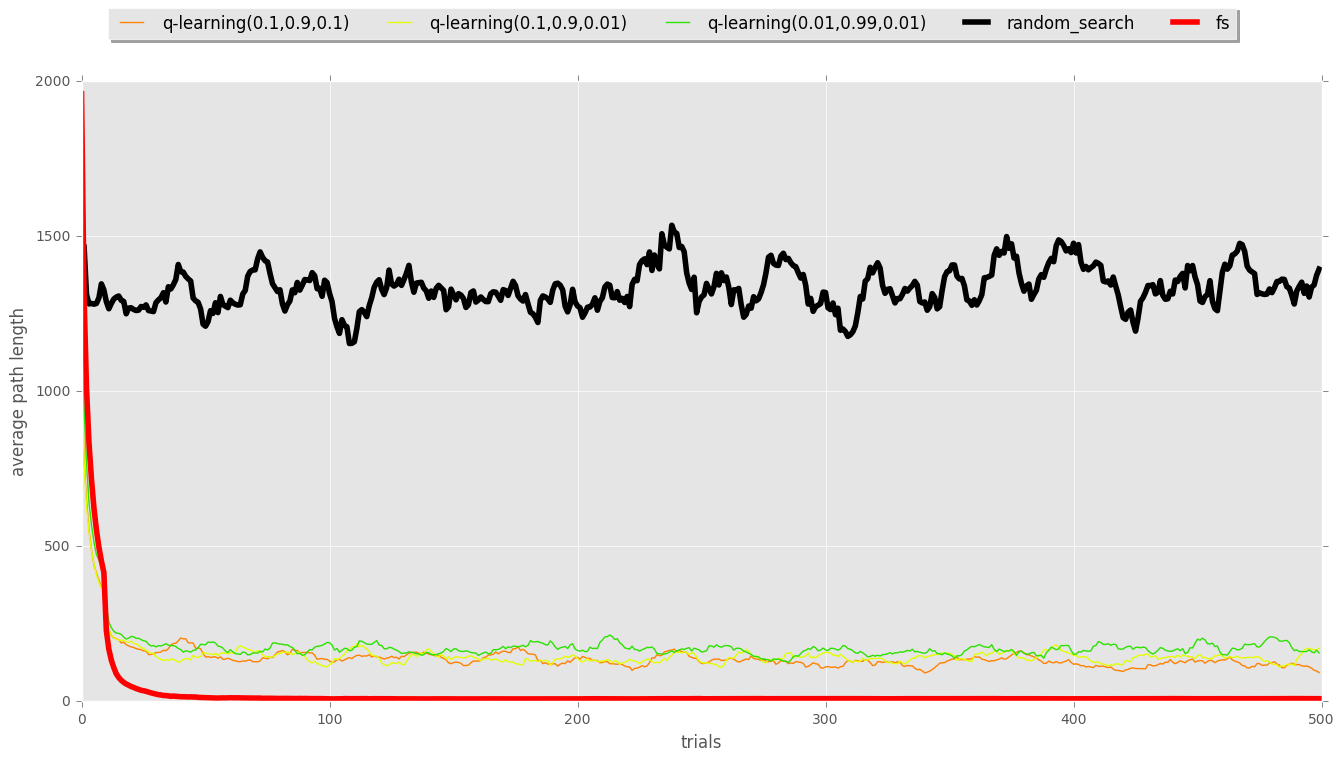

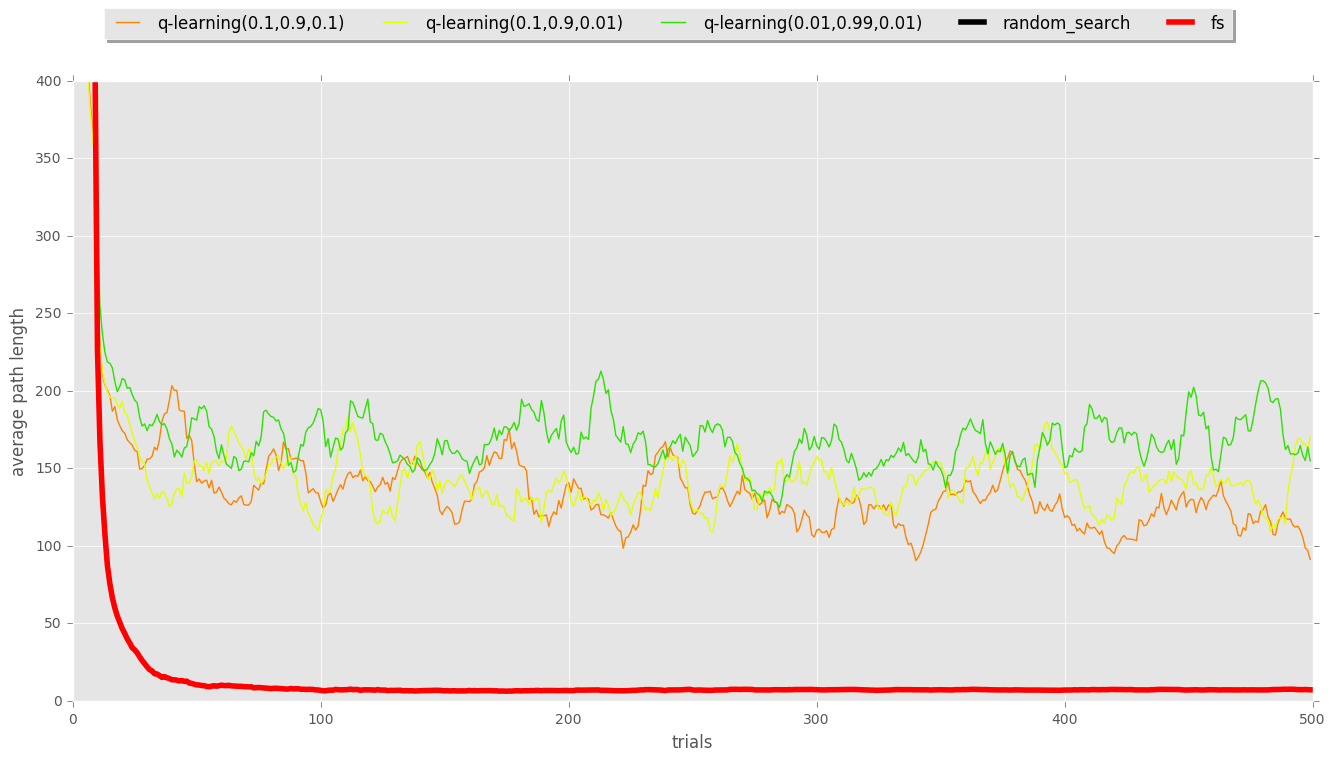

In [7]:
env_parameters = "/N400_M3/stochasticenvironment"
print "Stochastic Environment(доступность всех переходов меняется между испытаниями)"
vizualize_results(folder_with_BA_results + env_parameters, xlim=(0,500), **base_plot_params)
vizualize_results(folder_with_BA_results + env_parameters, xlim=(0,500),  ylim=(0,400), **base_plot_params)

Марковский процесс принятия решений(доступность перехода разыгрывается во время действия)


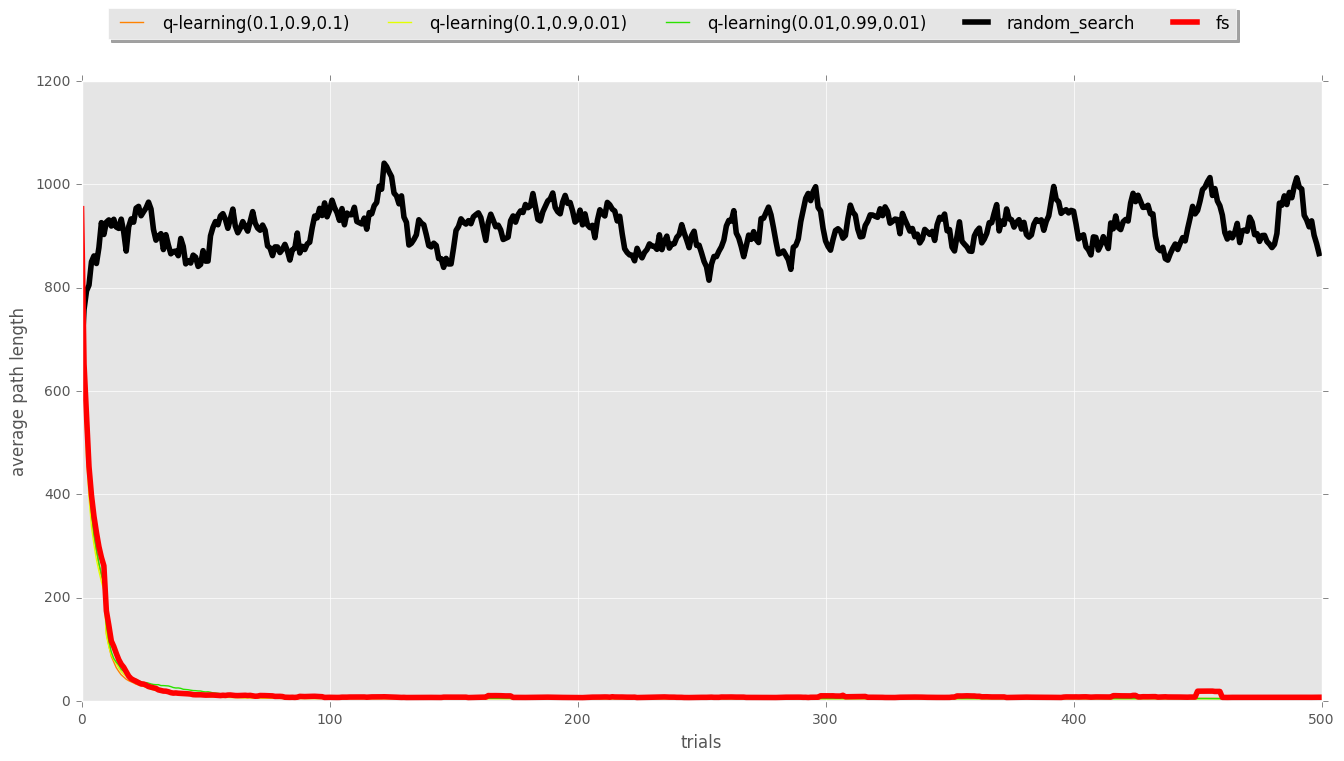

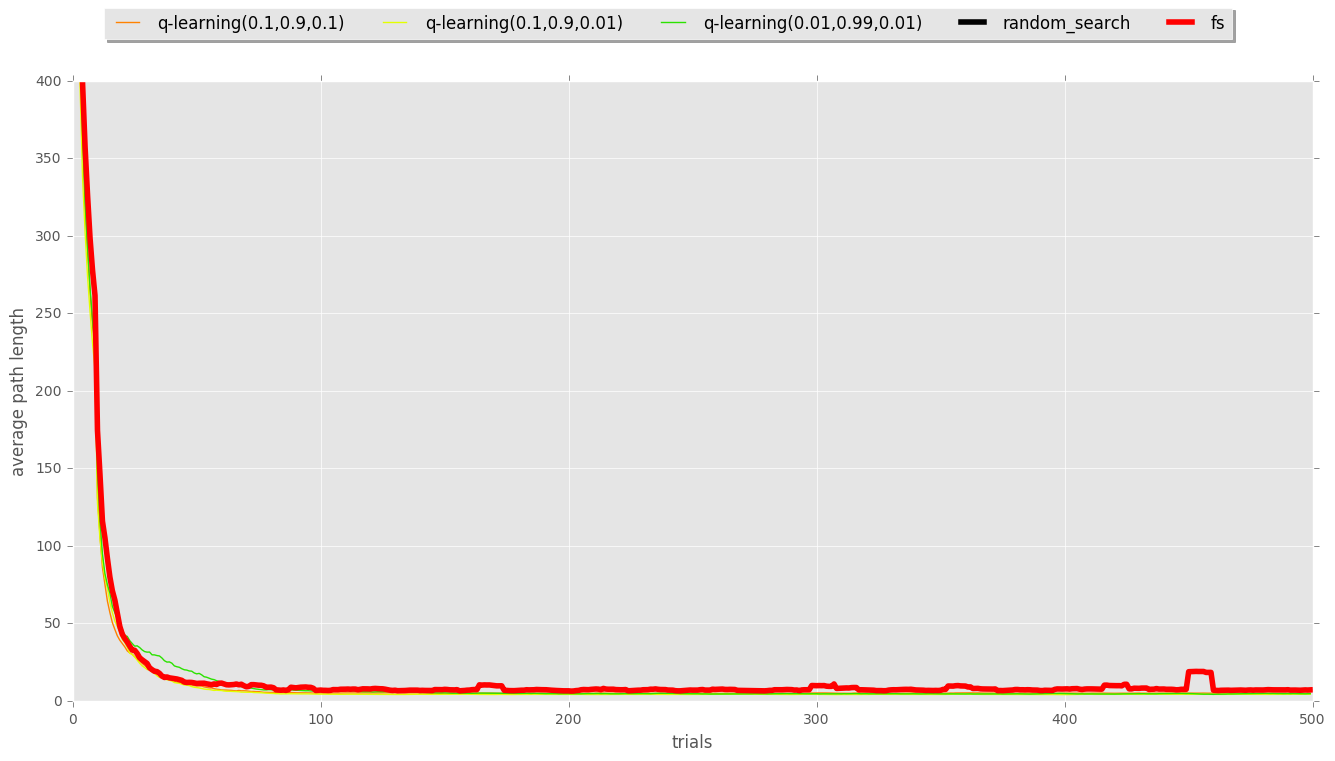

In [8]:
env_parameters = "/N400_M3/markovenvironment"
print "Марковский процесс принятия решений(доступность перехода разыгрывается во время действия)"
vizualize_results(folder_with_BA_results + env_parameters, xlim=(0,500), **base_plot_params)
vizualize_results(folder_with_BA_results + env_parameters, xlim=(0,500),  ylim=(0,400), **base_plot_params)

Промежуточный вариант (Доступность переходов из состояния разыгрывается при попадении в это состояние)


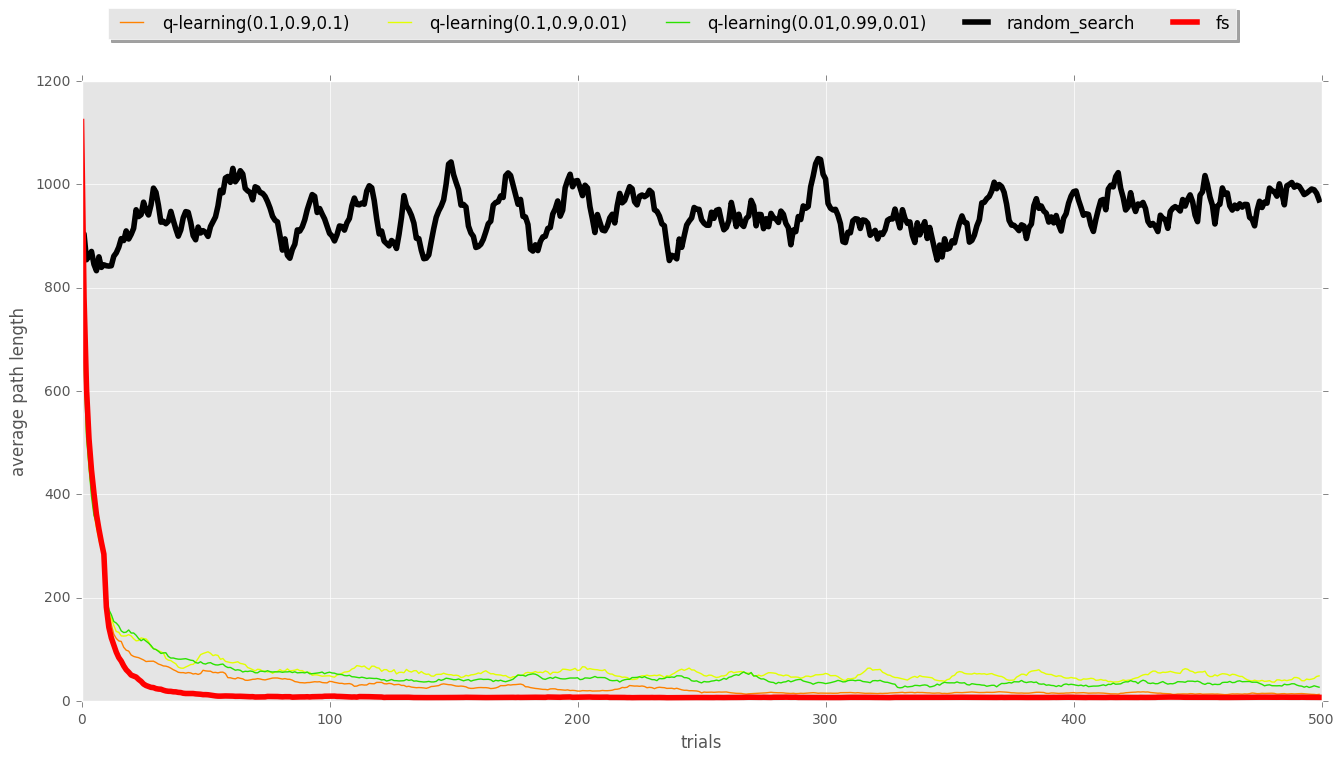

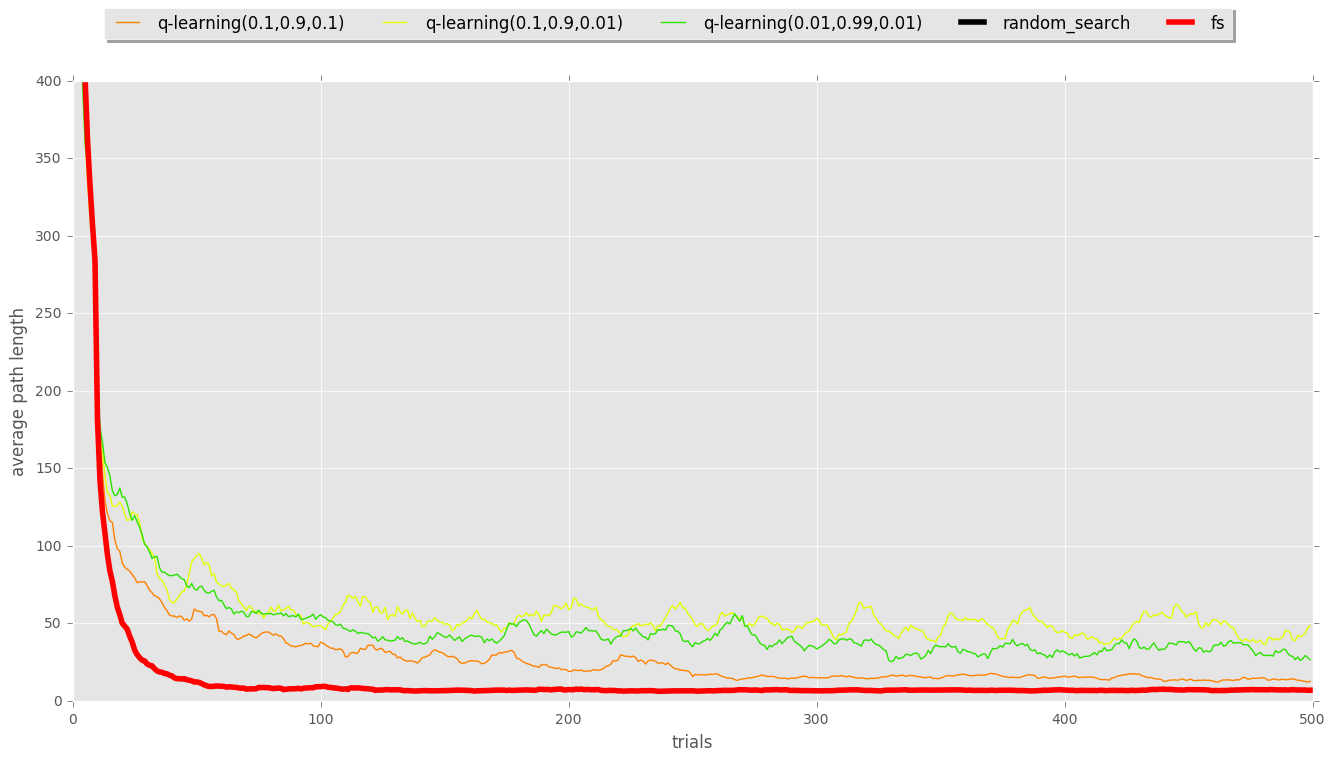

In [9]:
env_parameters = "/N400_M3/changestatestochasticityenv"
print "Промежуточный вариант (Доступность переходов из состояния разыгрывается при попадении в это состояние)"
vizualize_results(folder_with_BA_results + env_parameters, xlim=(0,500), **base_plot_params)
vizualize_results(folder_with_BA_results + env_parameters, xlim=(0,500),  ylim=(0,400), **base_plot_params)

**Для сред меньших сред графики по сути представляют тоже самое, с поправкой на размер среды**

Другие комбинации параметров:
 * /N100_M3/stochasticenvironment
 * /N100_M3/changestatestochasticityenv
 * /N100_M3/markovenvironment
 
 
 * /N25_M3/stochasticenvironment
 * /N25_M3/changestatestochasticityenv
 * /N25_M3/markovenvironment

### 1.2 Сравнение эффективности обучения FS и лучшего табличного RL алгоритма в средах всех трех размеров:

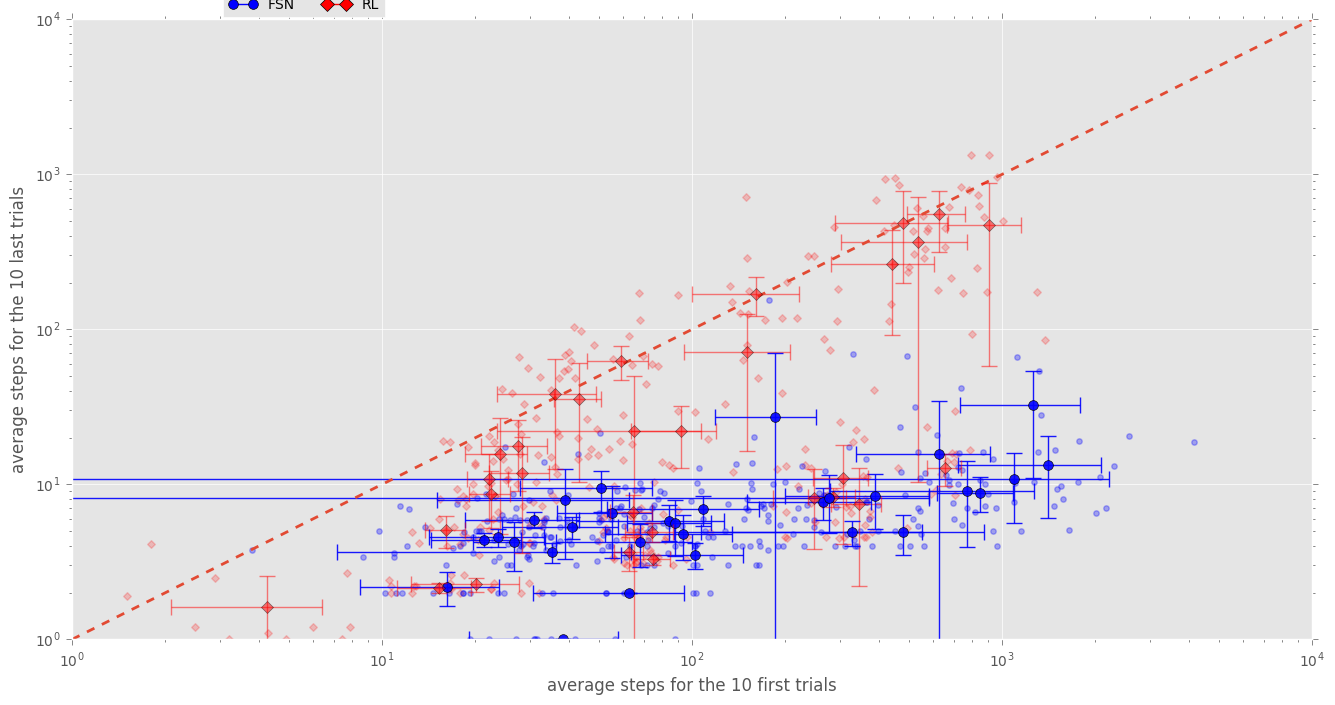

In [10]:
small_envs_results = folder_with_BA_results + "/N25_M3/stochasticenvironment"
middle_envs_results = folder_with_BA_results + "/N100_M3/stochasticenvironment"
big_envs_results = folder_with_BA_results + "/N400_M3/stochasticenvironment"

vizualize_first10_vs_last10_fs_and_rl(small_envs_results,
                                     middle_envs_results,
                                     big_envs_results)

## 2. Erdos-Renyi model

In [11]:
folder_with_ER_results = join_path(results_dir, "erdos_renyi")

### 2.1 Результаты для модели с параметрами $N = 400$,  $p = 0.015$

Stochastic Environment(доступность всех переходов меняется между испытаниями)


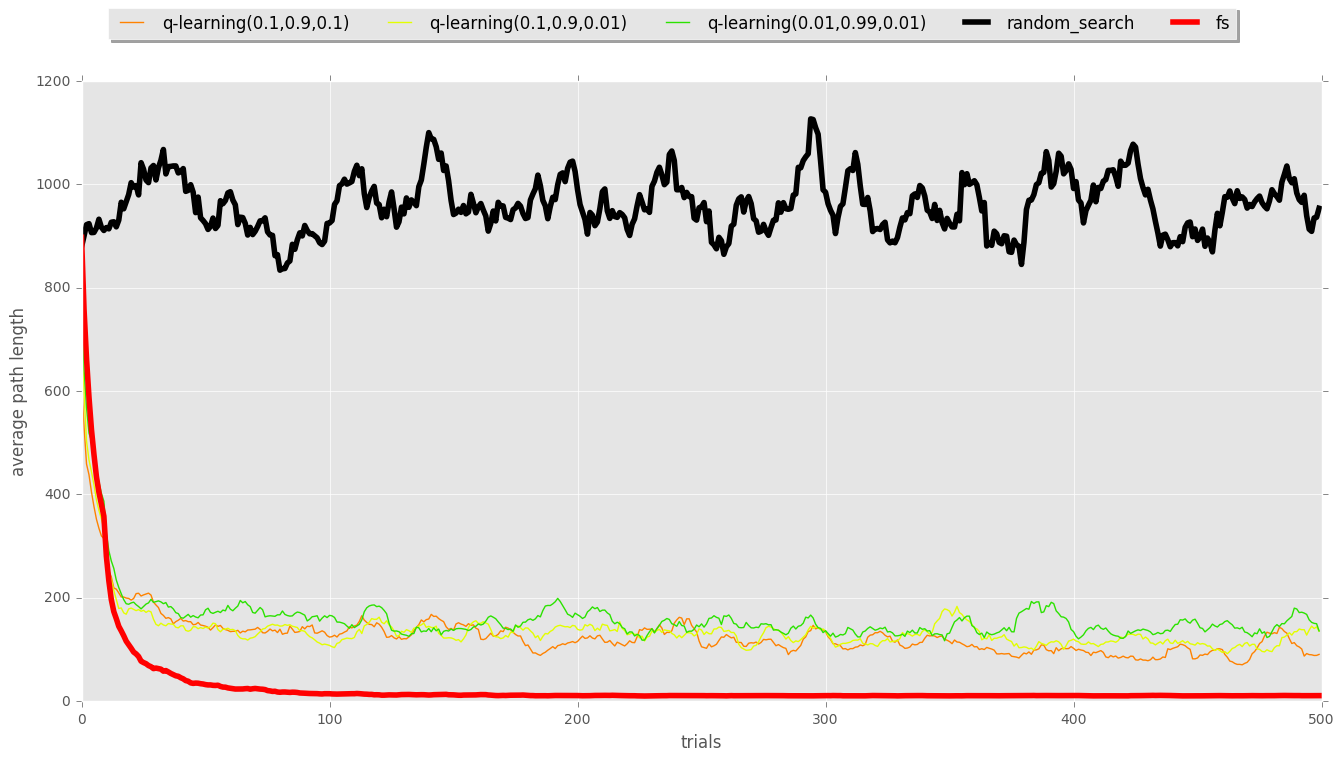

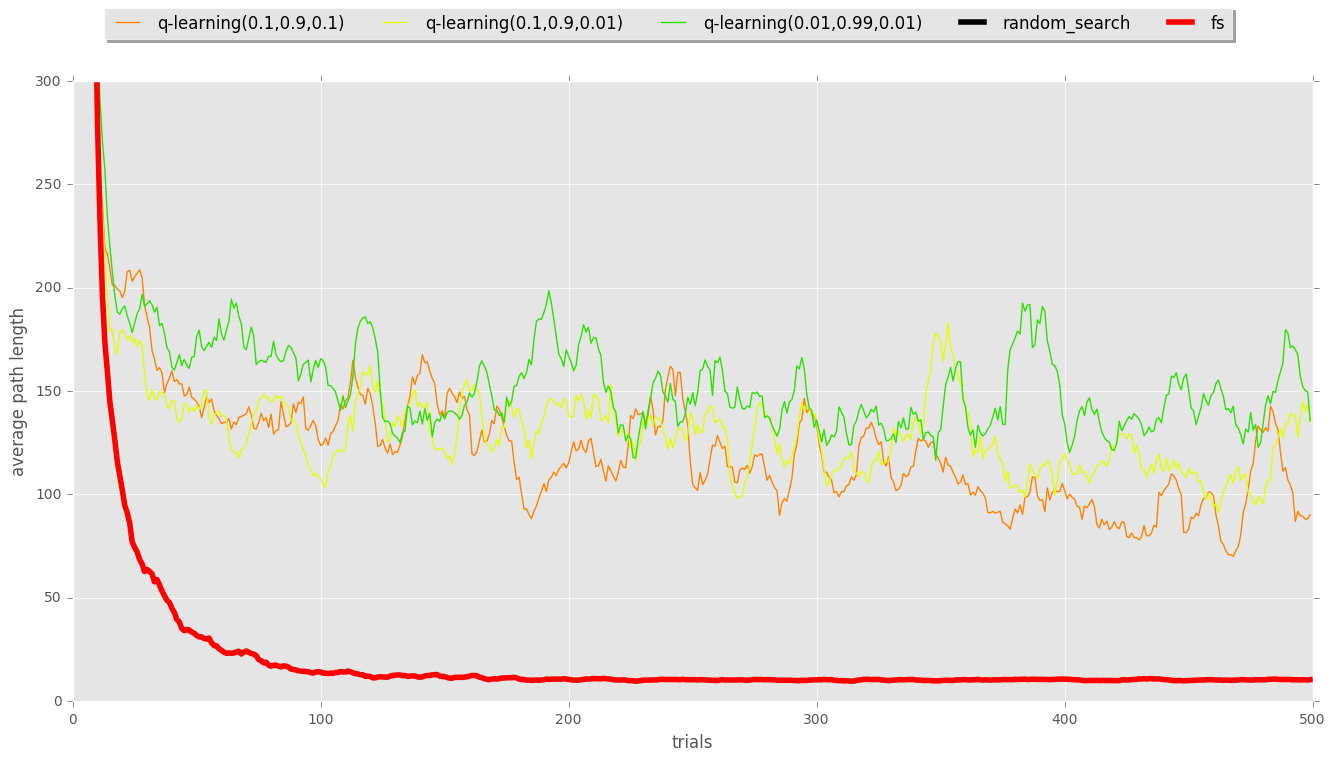

In [12]:
env_parameters = "/n400_p0.015/stochasticenvironment"
print "Stochastic Environment(доступность всех переходов меняется между испытаниями)"
vizualize_results(folder_with_ER_results + env_parameters, xlim=(0,500), **base_plot_params)
vizualize_results(folder_with_ER_results + env_parameters, xlim=(0,500),  ylim=(0,300), **base_plot_params)

МППР


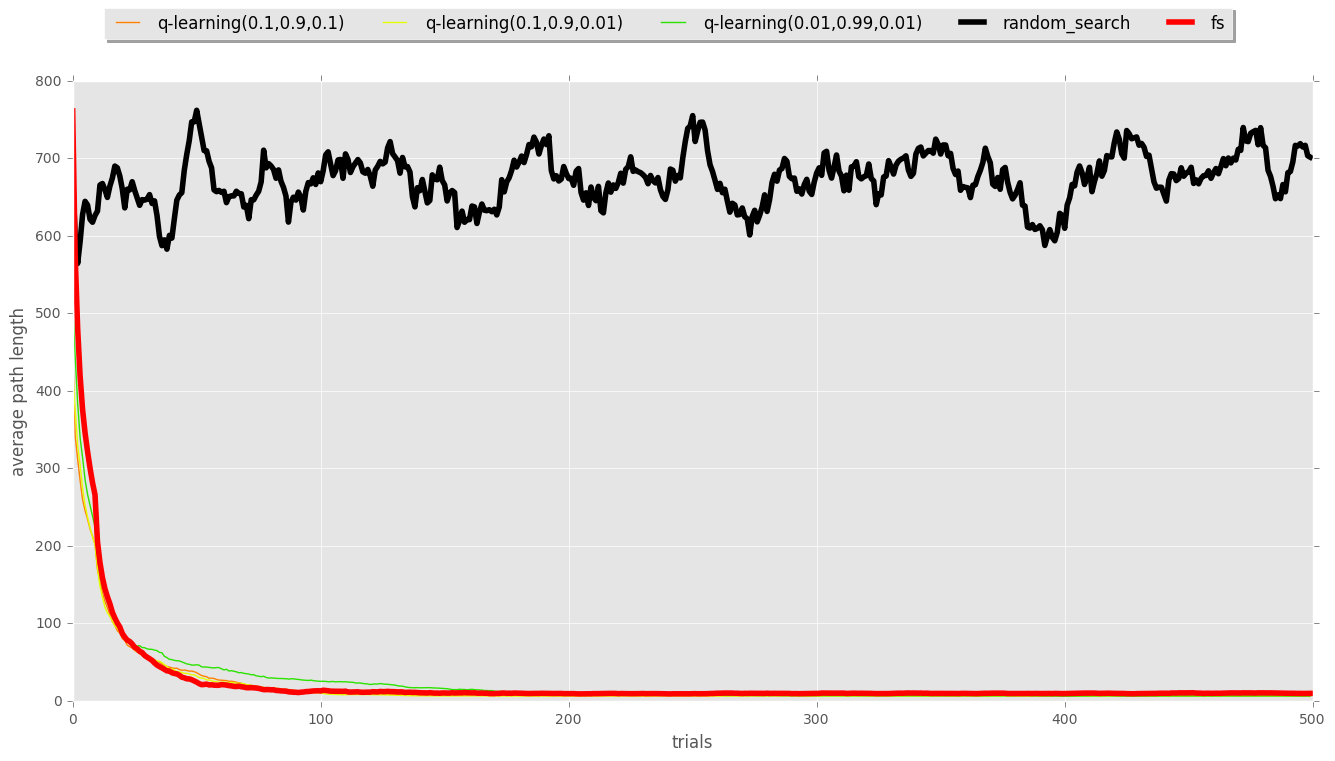

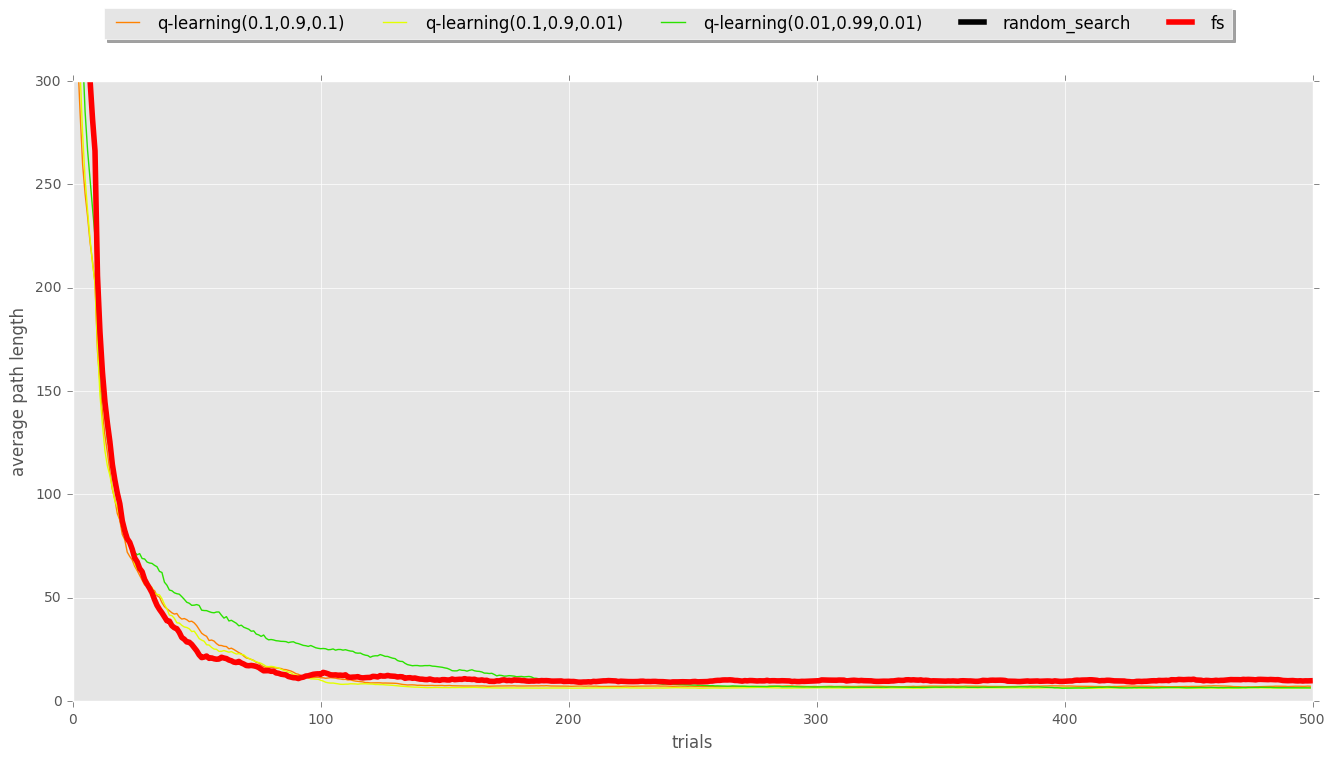

In [13]:
env_parameters = "/n400_p0.015/markovenvironment"
print "МППР"
vizualize_results(folder_with_ER_results + env_parameters, xlim=(0,500), **base_plot_params)
vizualize_results(folder_with_ER_results + env_parameters, xlim=(0,500),  ylim=(0,300), **base_plot_params)

Промежуточный вариант


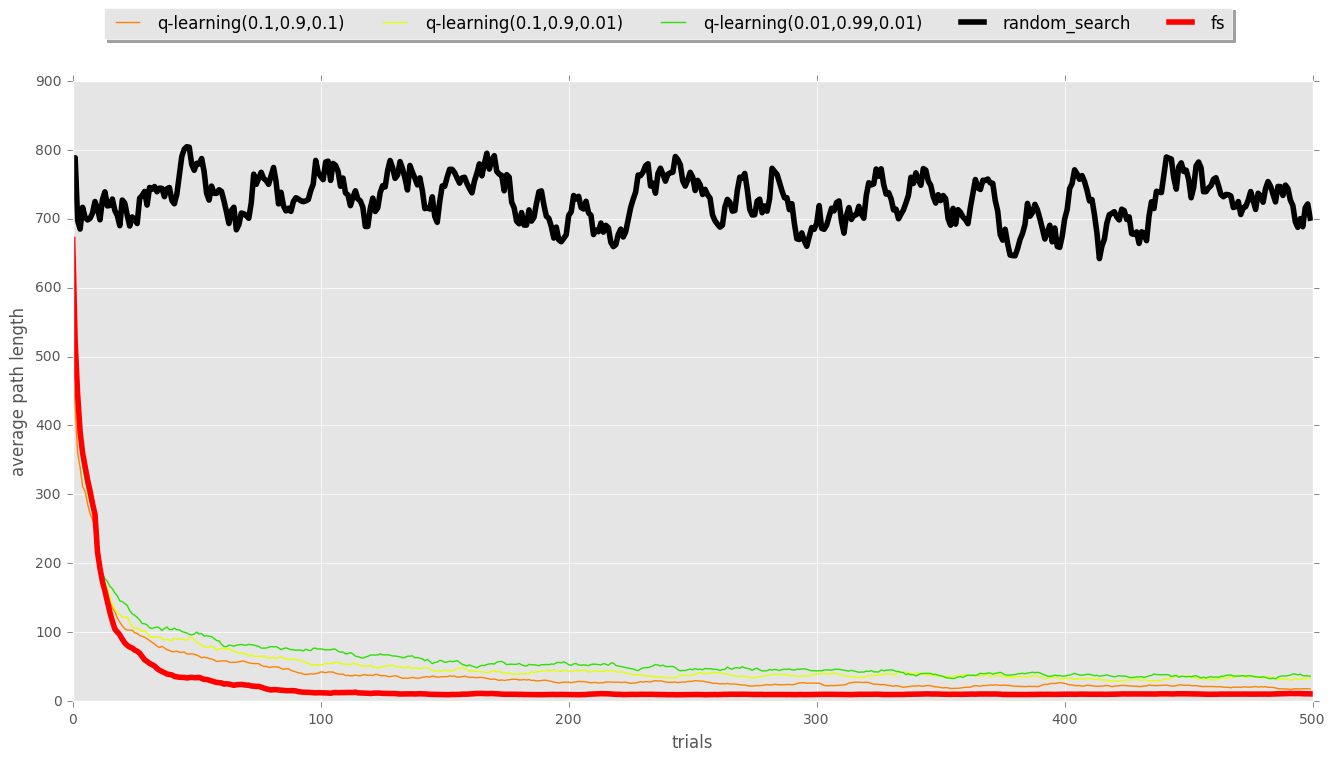

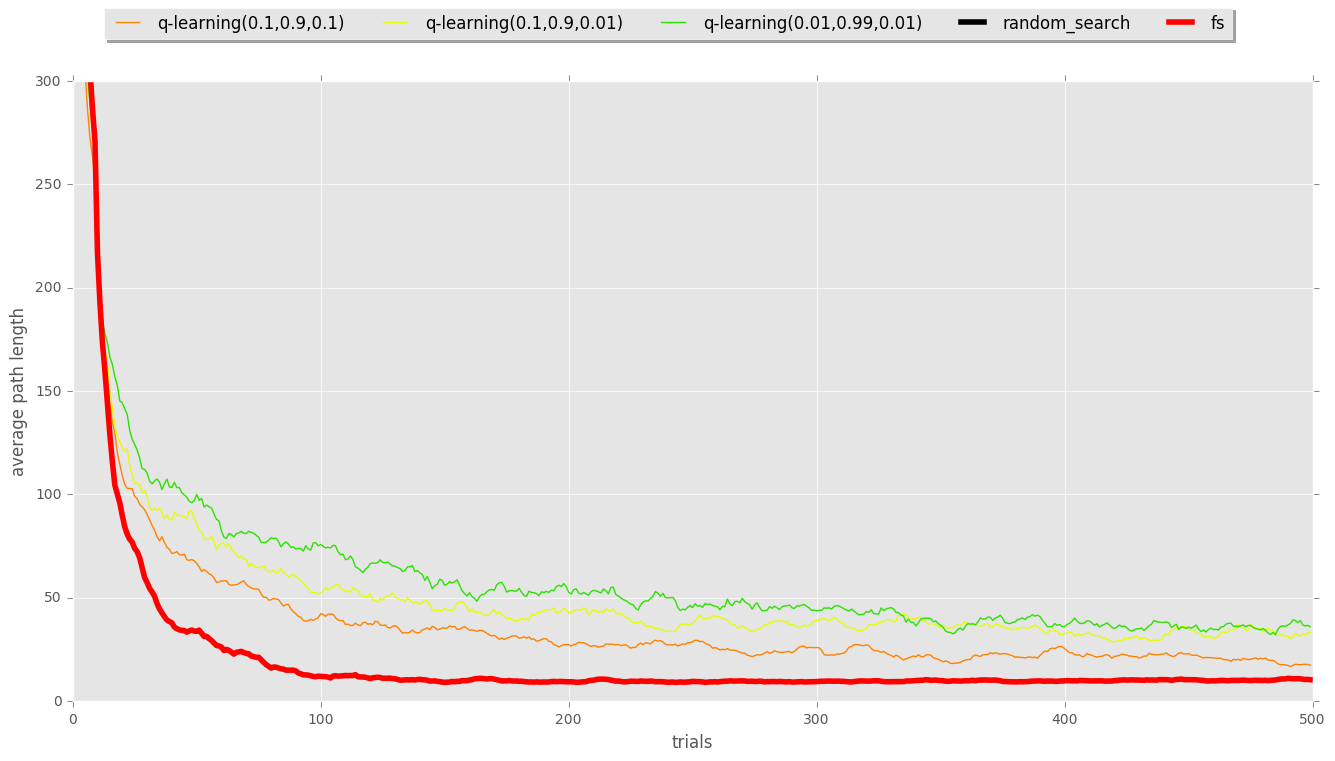

In [14]:
env_parameters = "/n400_p0.015/changestatestochasticityenv"
print "Промежуточный вариант"
vizualize_results(folder_with_ER_results + env_parameters, xlim=(0,500), **base_plot_params)
vizualize_results(folder_with_ER_results + env_parameters, xlim=(0,500),  ylim=(0,300), **base_plot_params)

**Для сред меньших сред графики по сути представляют тоже самое, с поправкой на размер среды**

Другие комбинации параметров:
 * /n100_p0.06/stochasticenvironment
 * /n100_p0.06/changestatestochasticityenv
 * /n100_p0.06/markovenvironment
 
 
 * /n25_p0.25/stochasticenvironment
 * /n25_p0.25/changestatestochasticityenv
 * /n25_p0.25/markovenvironment

###2.2 Сравнение эффективности обучения FS и лучшего табличного RL алгоритма в средах всех трех размеров:

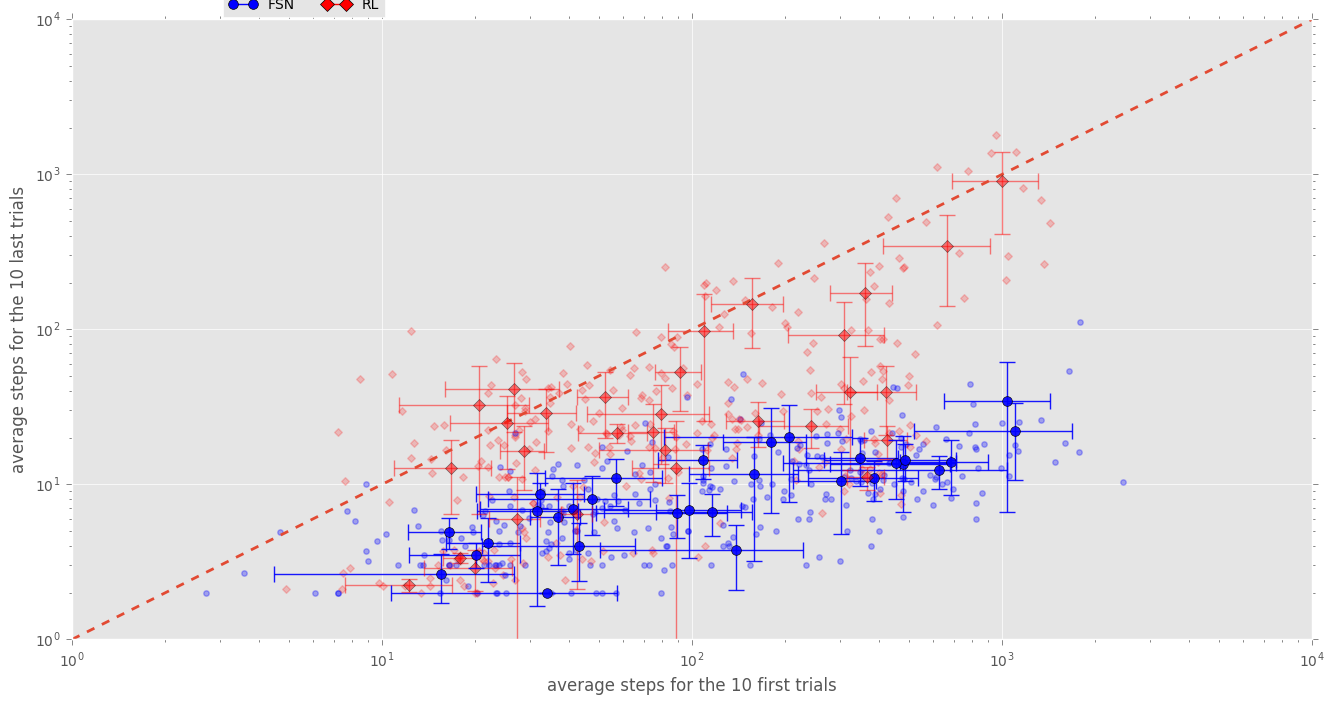

In [15]:
small_envs_results = folder_with_ER_results + "/n25_p0.25/stochasticenvironment"
middle_envs_results = folder_with_ER_results + "/n100_p0.06/stochasticenvironment"
big_envs_results = folder_with_ER_results + "/n400_p0.015/stochasticenvironment"

vizualize_first10_vs_last10_fs_and_rl(small_envs_results,
                                     middle_envs_results,
                                     big_envs_results)

##3. Watts-Strogatz model

In [16]:
folder_with_WS_results = join_path(results_dir, "watts_strogatz")

###3.1 Результаты для модели с параметрами $N = 400$, $K = 6$, $\beta = 0.1$

Stochastic Environment(доступность всех переходов меняется между испытаниями)


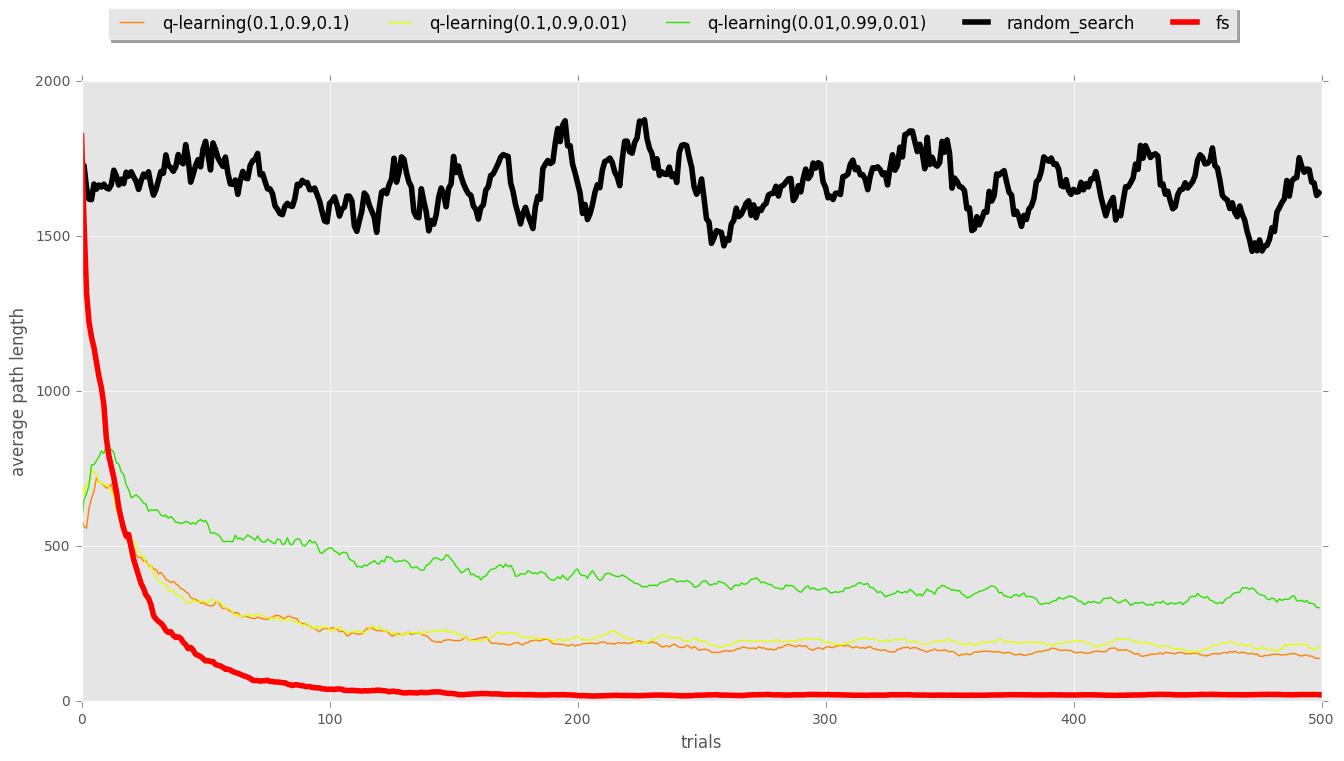

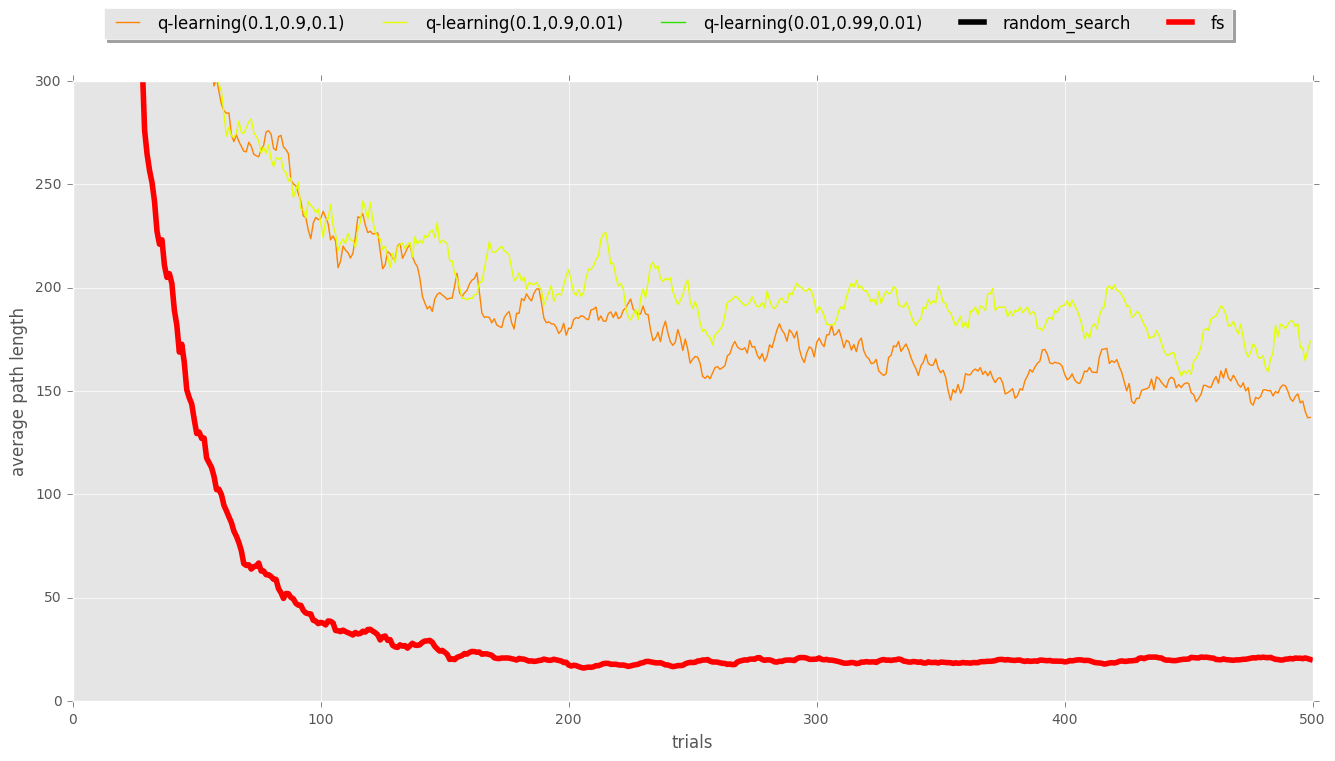

In [17]:
env_parameters = "/N400_K6_b0.1/stochasticenvironment"
print "Stochastic Environment(доступность всех переходов меняется между испытаниями)"
vizualize_results(folder_with_WS_results + env_parameters, xlim=(0,500), **base_plot_params)
vizualize_results(folder_with_WS_results + env_parameters, xlim=(0,500),  ylim=(0,300), **base_plot_params)

МППР


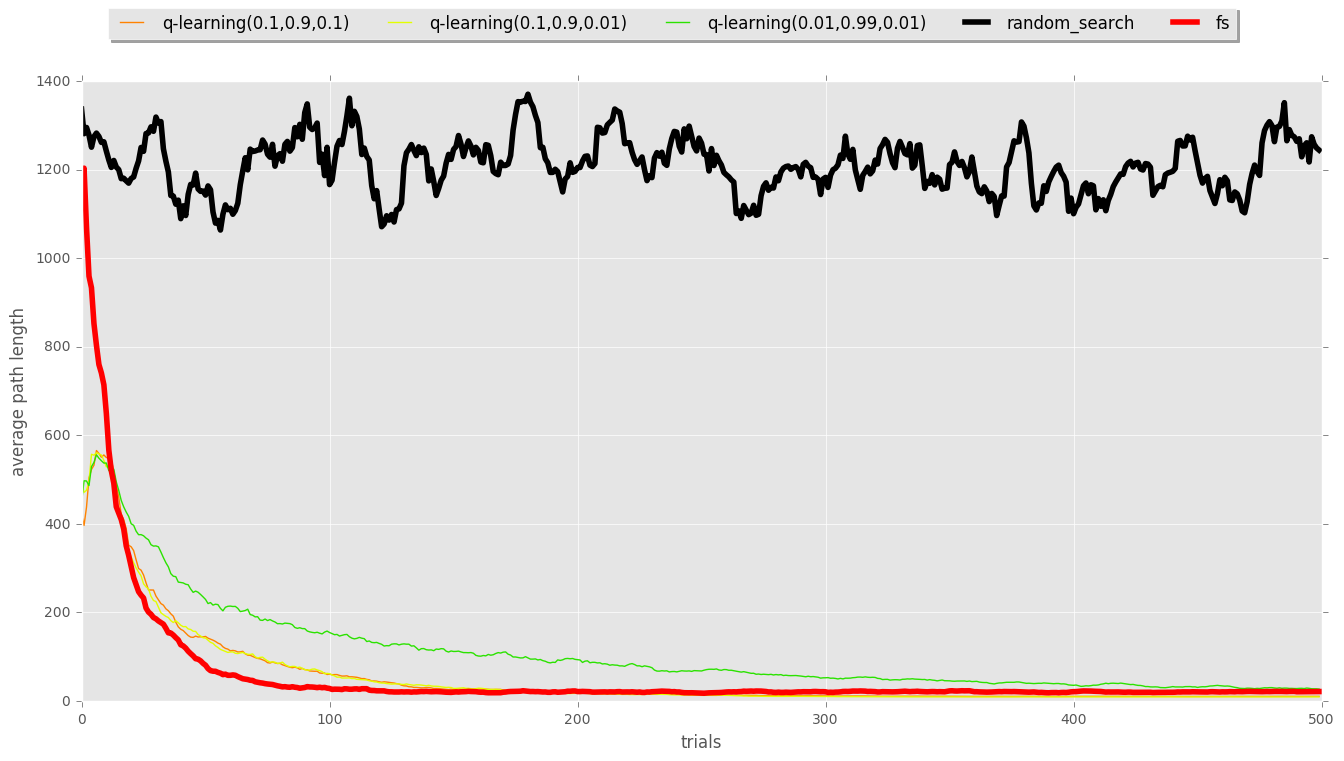

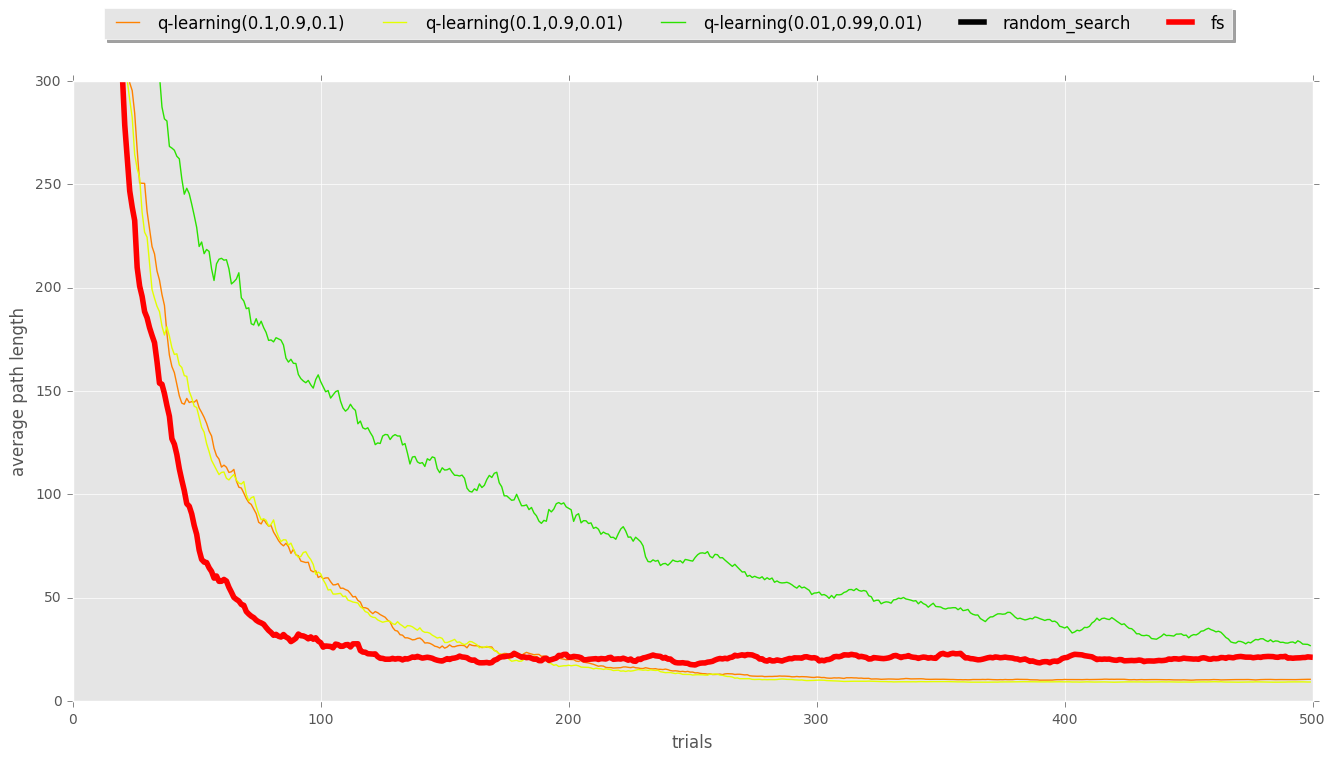

In [18]:

env_parameters = "/N400_K6_b0.1/markovenvironment"
print "МППР"
vizualize_results(folder_with_WS_results + env_parameters, xlim=(0,500), **base_plot_params)
vizualize_results(folder_with_WS_results + env_parameters, xlim=(0,500),  ylim=(0,300), **base_plot_params)

Промежуточный вариант


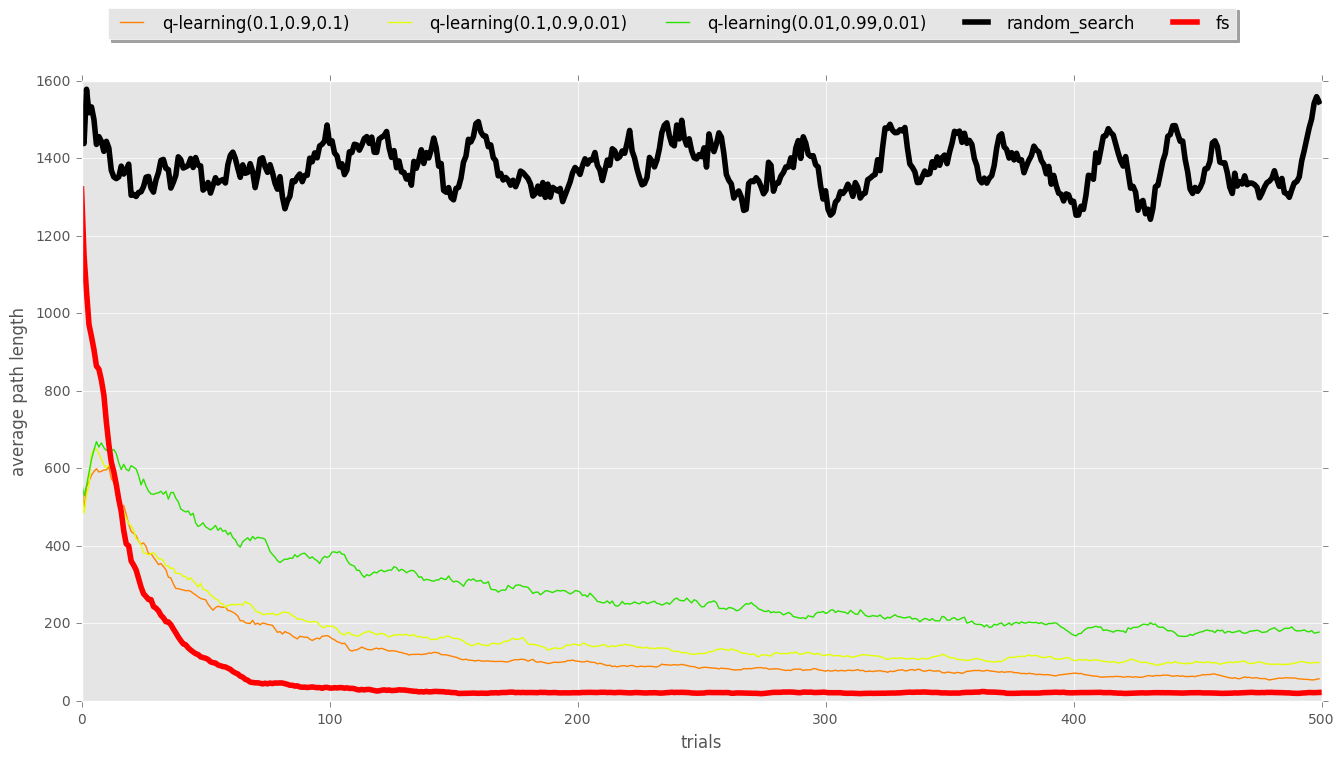

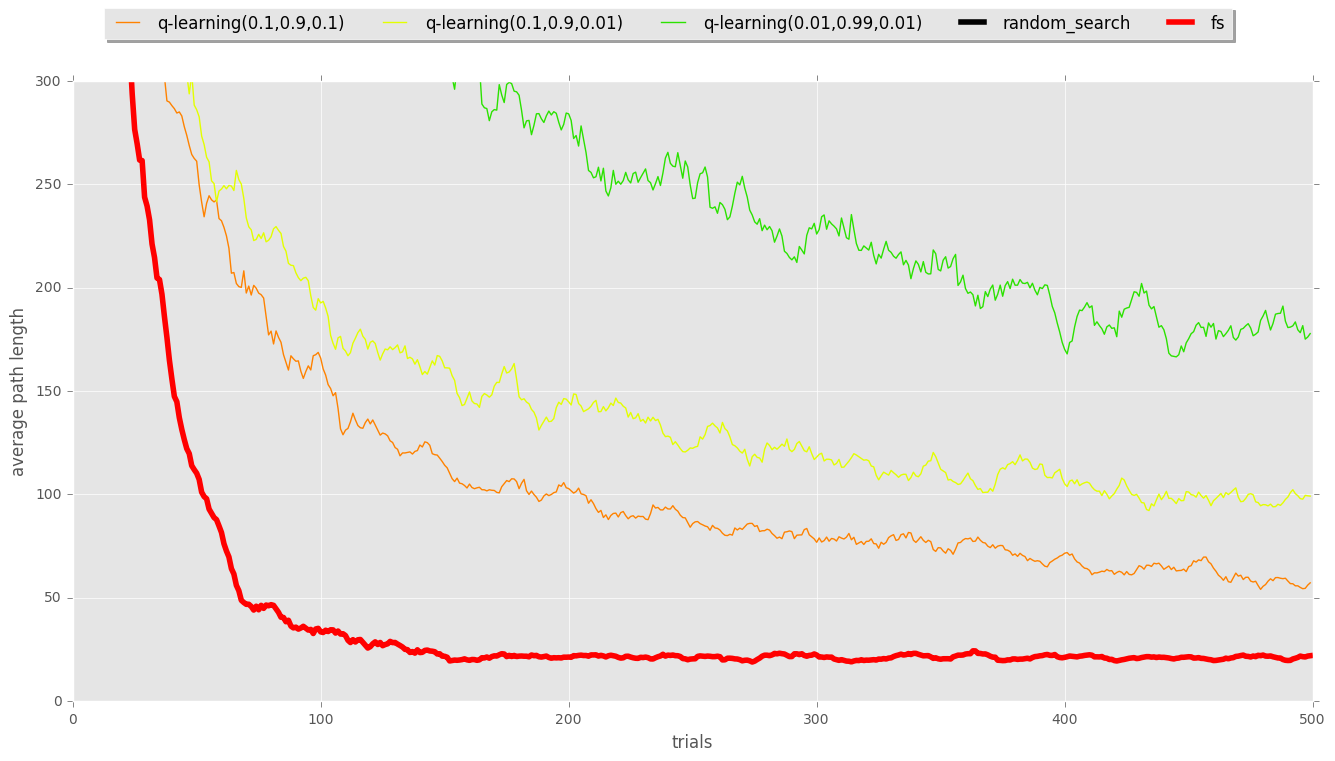

In [19]:

env_parameters = "/N400_K6_b0.1/changestatestochasticityenv"
print "Промежуточный вариант"
vizualize_results(folder_with_WS_results + env_parameters, xlim=(0,500), **base_plot_params)
vizualize_results(folder_with_WS_results + env_parameters, xlim=(0,500),  ylim=(0,300), **base_plot_params)

**Для сред меньших сред графики по сути представляют тоже самое, с поправкой на размер среды**

Другие комбинации параметров:
 * /N100_K6_b0.1/stochasticenvironment
 * /N100_K6_b0.1/changestatestochasticityenv
 * /N100_K6_b0.1/markovenvironment
 
 
 * /N25_K6_b0.1/stochasticenvironment
 * /N25_K6_b0.1/changestatestochasticityenv
 * /N25_K6_b0.1/markovenvironment

###3.2 Сравнение эффективности обучения FS и лучшего табличного RL алгоритма в средах всех трех размеров:

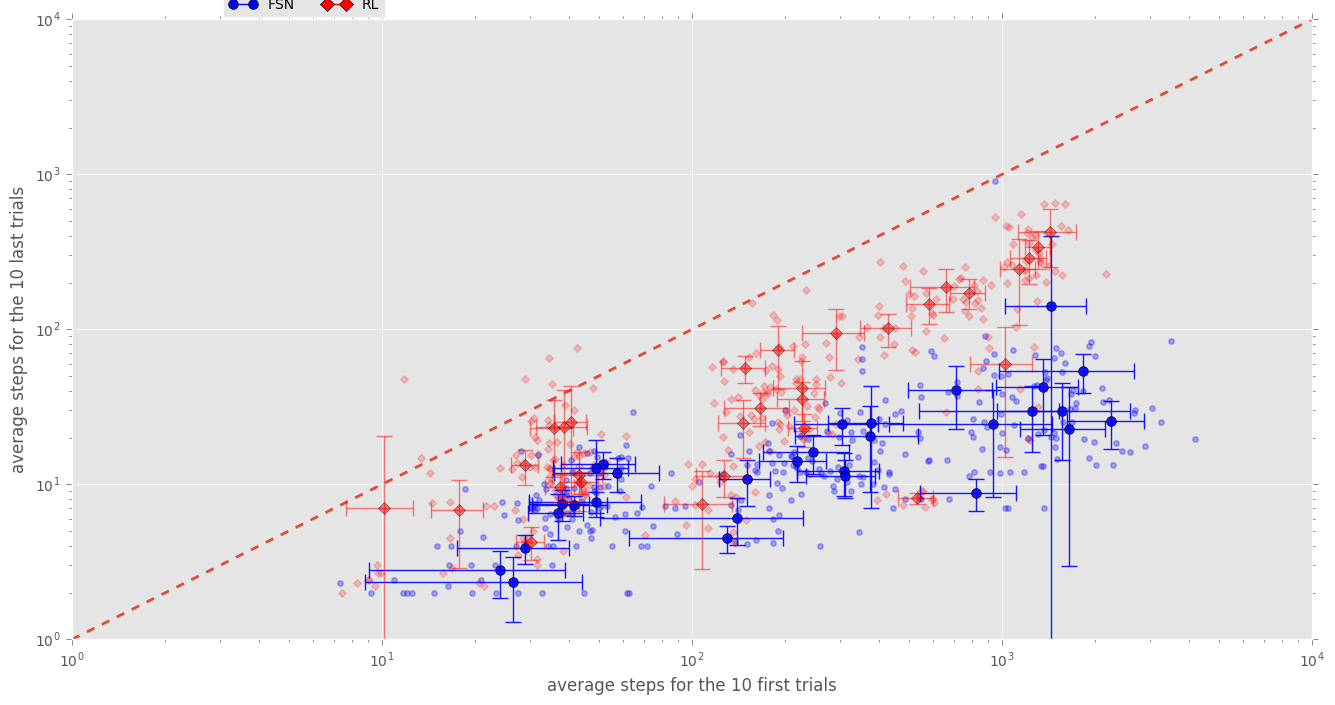

In [20]:
small_envs_results = folder_with_WS_results + "/N25_K6_b0.1/stochasticenvironment"
middle_envs_results = folder_with_WS_results + "/N100_K6_b0.1/stochasticenvironment"
big_envs_results = folder_with_WS_results + "/N400_K6_b0.1/stochasticenvironment"

vizualize_first10_vs_last10_fs_and_rl(small_envs_results,
                                     middle_envs_results,
                                     big_envs_results)

### Данные для таблицы

In [21]:

def print_table(small_envs_results, medium_envs_results, big_envs_results):
    
    fs_small = load_results(small_envs_results + "/all_paths_{0}.json", xrange(1, 11))
    fs_medium = load_results(medium_envs_results + "/all_paths_{0}.json", xrange(1, 11))
    fs_big = load_results(big_envs_results + "/all_paths_{0}.json", xrange(1, 11))
    
    rl_small = load_results(small_envs_results + "/q-learning_(0.1,0.9, 0.1)_{0}.json", xrange(1, 11))
    rl_medium = load_results(medium_envs_results + "/q-learning_(0.1,0.9, 0.1)_{0}.json", xrange(1, 11))
    rl_big = load_results(big_envs_results + "/q-learning_(0.1,0.9, 0.1)_{0}.json", xrange(1, 11))
    
    rnd_small = load_results(small_envs_results + "/rnd_paths_{0}.json", xrange(1, 11))
    rnd_medium = load_results(medium_envs_results + "/rnd_paths_{0}.json", xrange(1, 11))
    rnd_big = load_results(big_envs_results + "/rnd_paths_{0}.json", xrange(1, 11))
    
    #medians
    m_fs_small = dr.np.median(fs_small[:,-10:])
    m_fs_medium = dr.np.median(fs_medium[:,-10:])
    m_fs_big = dr.np.median(fs_big[:,-10:])
    
    m_rl_small = dr.np.median(rl_small[:,-10:])
    m_rl_medium = dr.np.median(rl_medium[:,-10:])
    m_rl_big = dr.np.median(rl_big[:,-10:])
    
    m_rnd_small = dr.np.median(rnd_small[:,-10:])
    m_rnd_medium = dr.np.median(rnd_medium[:,-10:])
    m_rnd_big = dr.np.median(rnd_big[:,-10:])
    
    #averages
    a_fs_small = dr.np.average(fs_small[:,-10:])
    a_fs_medium = dr.np.average(fs_medium[:,-10:])
    a_fs_big = dr.np.average(fs_big[:,-10:])
    
    a_rl_small = dr.np.average(rl_small[:,-10:])
    a_rl_medium = dr.np.average(rl_medium[:,-10:])
    a_rl_big = dr.np.average(rl_big[:,-10:])

    a_rnd_small = dr.np.average(rnd_small[:,-10:])
    a_rnd_medium = dr.np.average(rnd_medium[:,-10:])
    a_rnd_big = dr.np.average(rnd_big[:,-10:])

    format_row = lambda name,x,y,z : "{0:<15}|{1:<15}|{2:<15}|{3:<15}|".format(name,x,y,z)


    print 'median for the 10 last trials'
    print format_row("",'N25', 'N100', 'N400')
    print format_row('FS', m_fs_small, m_fs_medium, m_fs_big)
    print format_row('RL', m_rl_small, m_rl_medium, m_rl_big)
    print format_row('RND',m_rnd_small, m_rnd_medium, m_rnd_big)

    print '\n','average for the 10 last trials'
    print format_row("",'N25', 'N100', 'N400')
    print format_row('FS',a_fs_small, a_fs_medium, a_fs_big)
    print format_row('RL',a_rl_small, a_rl_medium, a_rl_big)
    print format_row('RND',a_rnd_small, a_rnd_medium, a_rnd_big)
    
    print '\n','Ratio RND/FS'
    print format_row('ratio m', m_rnd_small/m_fs_small, m_rnd_medium/m_fs_medium, m_rnd_big/m_fs_big)
    print format_row('ratio avr', a_rnd_small/a_fs_small, a_rnd_medium/a_fs_medium, a_rnd_big/a_fs_big)
    
    print '\n','Ratio RND/RL'
    print format_row('ratio m', m_rnd_small/m_rl_small, m_rnd_medium/m_rl_medium, m_rnd_big/m_rl_big)
    print format_row('ratio avr', a_rnd_small/a_rl_small, a_rnd_medium/a_rl_medium, a_rnd_big/a_rl_big)
    
    print '\n','Ratio RL/FS'
    print format_row('ratio m', m_rl_small/m_fs_small, m_rl_medium/m_fs_medium, m_rl_big/m_fs_big)
    print format_row('ratio avr', a_rl_small/a_fs_small, a_rl_medium/a_fs_medium, a_rl_big/a_fs_big)


#5x5 & 7 & 61 & 13.658 & 108.7 & 8.786 & 7.959 \\
#Таблицу я обновил!


In [22]:
print "WATTS-STROGATZ and FIRST TYPE STOCHASTICTY!"
small_envs_results = folder_with_WS_results + "/N25_K6_b0.1/stochasticenvironment"
middle_envs_results = folder_with_WS_results + "/N100_K6_b0.1/stochasticenvironment"
big_envs_results = folder_with_WS_results + "/N400_K6_b0.1/stochasticenvironment"

print_table(small_envs_results,
         middle_envs_results,
         big_envs_results)

WATTS-STROGATZ and FIRST TYPE STOCHASTICTY!
median for the 10 last trials
               |N25            |N100           |N400           |
FS             |6.0            |10.0           |17.0           |
RL             |7.0            |20.0           |105.0          |
RND            |60.0           |312.5          |1449.0         |

average for the 10 last trials
               |N25            |N100           |N400           |
FS             |7.621          |14.536         |42.058         |
RL             |13.493         |40.009         |197.462        |
RND            |85.449         |480.603        |2376.808       |

Ratio RND/FS
ratio m        |10.0           |31.25          |85.2352941176  |
ratio avr      |11.2123080961  |33.0629471657  |56.512625422   |

Ratio RND/RL
ratio m        |8.57142857143  |15.625         |13.8           |
ratio avr      |6.33283924998  |12.0123722163  |12.0367868248  |

Ratio RL/FS
ratio m        |1.16666666667  |2.0            |6.17647058824  |
ratio av

In [23]:
print "TORUS and FIRST TYPE STOCHASTICTY!"
folder_with_TORUS_results = join_path(results_dir, "torus")

small_envs_results = folder_with_TORUS_results + "/5x5/stochasticenvironment"
middle_envs_results = folder_with_TORUS_results + "/10x10_other/stochasticenvironment"
big_envs_results = folder_with_TORUS_results + "/20x20/stochasticenvironment"


print_table(small_envs_results,
         middle_envs_results,
         big_envs_results)

TORUS and FIRST TYPE STOCHASTICTY!
median for the 10 last trials
               |N25            |N100           |N400           |
FS             |7.0            |17.0           |70.0           |
RL             |13.0           |77.0           |373.0          |
RND            |61.5           |449.5          |2025.0         |

average for the 10 last trials
               |N25            |N100           |N400           |
FS             |13.658         |55.283         |262.637        |
RL             |42.785         |166.371        |562.231        |
RND            |108.7          |630.999        |3088.579       |

Ratio RND/FS
ratio m        |8.78571428571  |26.4411764706  |28.9285714286  |
ratio avr      |7.95870552057  |11.4139789809  |11.7598777019  |

Ratio RND/RL
ratio m        |4.73076923077  |5.83766233766  |5.42895442359  |
ratio avr      |2.54061002688  |3.79272228934  |5.49343419342  |

Ratio RL/FS
ratio m        |1.85714285714  |4.52941176471  |5.32857142857  |
ratio avr      |3

In [24]:
print "WATTS-STROGATZ and SECOND TYPE STOCHASTICTY!"
small_envs_results = folder_with_WS_results + "/N25_K6_b0.1/changestatestochasticityenv"
middle_envs_results = folder_with_WS_results + "/N100_K6_b0.1/changestatestochasticityenv"
big_envs_results = folder_with_WS_results + "/N400_K6_b0.1/changestatestochasticityenv"

print_table(small_envs_results,
            middle_envs_results,
            big_envs_results)

WATTS-STROGATZ and SECOND TYPE STOCHASTICTY!
median for the 10 last trials
               |N25            |N100           |N400           |
FS             |6.0            |9.0            |17.0           |
RL             |7.0            |15.0           |47.0           |
RND            |54.5           |305.0          |1317.0         |

average for the 10 last trials
               |N25            |N100           |N400           |
FS             |7.685          |15.507         |36.507         |
RL             |10.731         |23.619         |80.495         |
RND            |74.911         |425.961        |1984.142       |

Ratio RND/FS
ratio m        |9.08333333333  |33.8888888889  |77.4705882353  |
ratio avr      |9.74769030579  |27.4689495067  |54.3496315775  |

Ratio RND/RL
ratio m        |7.78571428571  |20.3333333333  |28.0212765957  |
ratio avr      |6.98080328022  |18.0346754731  |24.6492577179  |

Ratio RL/FS
ratio m        |1.16666666667  |1.66666666667  |2.76470588235  |
ratio a

### Обьединим результаты по всем имеющися топологиям

In [25]:
def cumulative_load_results(folders, files_template, file_indices):
    
    results = []
    for folder in folders:
        for i in file_indices:
            results.extend(dr.get_json_data(folder +'/' + files_template.format(i)))
        
    results = dr.np.array(results) #dr.np.clip(dr.np.array(results),0,2000)    
    return results  

def cumulative_print_table(small_envs_folders, medium_envs_folders, big_envs_folders):
    
    fs_small = cumulative_load_results(small_envs_folders, "all_paths_{0}.json", xrange(1, 11))
    fs_medium = cumulative_load_results(medium_envs_folders, "all_paths_{0}.json", xrange(1, 11))
    fs_big = cumulative_load_results(big_envs_folders, "all_paths_{0}.json", xrange(1, 11))
    
    rl_small = cumulative_load_results(small_envs_folders,  "q-learning_(0.1,0.9, 0.1)_{0}.json", xrange(1, 11))
    rl_medium = cumulative_load_results(medium_envs_folders, "q-learning_(0.1,0.9, 0.1)_{0}.json", xrange(1, 11))
    rl_big = cumulative_load_results(big_envs_folders, "q-learning_(0.1,0.9, 0.1)_{0}.json", xrange(1, 11))
    
    rnd_small = cumulative_load_results(small_envs_folders, "rnd_paths_{0}.json", xrange(1, 11))
    rnd_medium = cumulative_load_results(medium_envs_folders, "rnd_paths_{0}.json", xrange(1, 11))
    rnd_big = cumulative_load_results(big_envs_folders, "rnd_paths_{0}.json", xrange(1, 11))
    
    #medians
    m_fs_small = dr.np.median(fs_small[:,-10:])
    m_fs_medium = dr.np.median(fs_medium[:,-10:])
    m_fs_big = dr.np.median(fs_big[:,-10:])
    
    m_rl_small = dr.np.median(rl_small[:,-10:])
    m_rl_medium = dr.np.median(rl_medium[:,-10:])
    m_rl_big = dr.np.median(rl_big[:,-10:])
    
    m_rnd_small = dr.np.median(rnd_small[:,-10:])
    m_rnd_medium = dr.np.median(rnd_medium[:,-10:])
    m_rnd_big = dr.np.median(rnd_big[:,-10:])
    
    #averages
    a_fs_small = dr.np.average(fs_small[:,-10:])
    a_fs_medium = dr.np.average(fs_medium[:,-10:])
    a_fs_big = dr.np.average(fs_big[:,-10:])
    
    a_rl_small = dr.np.average(rl_small[:,-10:])
    a_rl_medium = dr.np.average(rl_medium[:,-10:])
    a_rl_big = dr.np.average(rl_big[:,-10:])

    a_rnd_small = dr.np.average(rnd_small[:,-10:])
    a_rnd_medium = dr.np.average(rnd_medium[:,-10:])
    a_rnd_big = dr.np.average(rnd_big[:,-10:])

    format_row = lambda name,x,y,z : "{0:<15}|{1:<15}|{2:<15}|{3:<15}|".format(name,x,y,z)


    print 'median for the 10 last trials'
    print format_row("",'N25', 'N100', 'N400')
    print format_row('FS', m_fs_small, m_fs_medium, m_fs_big)
    print format_row('RL', m_rl_small, m_rl_medium, m_rl_big)
    print format_row('RND',m_rnd_small, m_rnd_medium, m_rnd_big)

    print '\n','average for the 10 last trials'
    print format_row("",'N25', 'N100', 'N400')
    print format_row('FS',a_fs_small, a_fs_medium, a_fs_big)
    print format_row('RL',a_rl_small, a_rl_medium, a_rl_big)
    print format_row('RND',a_rnd_small, a_rnd_medium, a_rnd_big)
    
    print '\n','Ratio RL/FS'
    print format_row('ratio m', m_rl_small/m_fs_small, m_rl_medium/m_fs_medium, m_rl_big/m_fs_big)
    print format_row('ratio avr', a_rl_small/a_fs_small, a_rl_medium/a_fs_medium, a_rl_big/a_fs_big)
    
    #print '\n','Ratio RND/FS'
    #print format_row('ratio m', m_rnd_small/m_fs_small, m_rnd_medium/m_fs_medium, m_rnd_big/m_fs_big)
    #print format_row('ratio avr', a_rnd_small/a_fs_small, a_rnd_medium/a_fs_medium, a_rnd_big/a_fs_big)
    
    #print '\n','Ratio RND/RL'
    #print format_row('ratio m', m_rnd_small/m_rl_small, m_rnd_medium/m_rl_medium, m_rnd_big/m_rl_big)
    #print format_row('ratio avr', a_rnd_small/a_rl_small, a_rnd_medium/a_rl_medium, a_rnd_big/a_rl_big)
    
    



### Сначала запишем данные о расположении наших результатов:

In [26]:
folder_with_TORUS_results = join_path(results_dir, "torus")

small_envs = [
    folder_with_ER_results + "/n25_p0.25",
    folder_with_WS_results + "/N25_K6_b0.1",
    folder_with_BA_results + "/N25_M3",
    folder_with_TORUS_results + "/5x5"
    ]

medium_envs = [
    folder_with_ER_results + "/n100_p0.06",
    folder_with_WS_results + "/N100_K6_b0.1",
    folder_with_BA_results + "/N100_M3",
    folder_with_TORUS_results + "/10x10_other"
    ]

big_envs = [
    folder_with_ER_results + "/n400_p0.015",
    folder_with_WS_results + "/N400_K6_b0.1",
    folder_with_BA_results + "/N400_M3",
    folder_with_TORUS_results + "/20x20"
    ]
stoch_types = {
    1:"stochasticenvironment",
    2:"changestatestochasticityenv",
    3:"markovenvironment"
    }

line_styles = {
    1:"-",
    2:"--",
    3:"-."
    }

In [27]:
def cumulative_reslut_table_for_type(type_id):
    type_name = stoch_types[type_id]
    small_envs_folders = [ folder + "/" + type_name for folder in small_envs]
    medium_envs_folders = [ folder + "/" + type_name for folder in medium_envs]
    big_envs_folders = [ folder + "/" + type_name for folder in big_envs]
    #print small_envs_folders
    cumulative_print_table(small_envs_folders, medium_envs_folders, big_envs_folders)
   

#### Результаты для первого типа стохастичности!

In [28]:
cumulative_reslut_table_for_type(1) 

median for the 10 last trials
               |N25            |N100           |N400           |
FS             |5.0            |9.0            |15.0           |
RL             |7.0            |18.0           |97.0           |
RND            |55.0           |260.5          |1272.0         |

average for the 10 last trials
               |N25            |N100           |N400           |
FS             |8.24475        |21.552         |83.10725       |
RL             |24.4025        |69.4695        |286.303        |
RND            |92.49425       |426.82475      |2190.11025     |

Ratio RL/FS
ratio m        |1.4            |2.0            |6.46666666667  |
ratio avr      |2.95976227296  |3.2233435412   |3.44498223681  |


#### Результаты для второго типа стохастичности!

In [29]:
# cumulative_reslut_table_for_type(2) 

#### Результаты для третьего типа стохастичности!

In [30]:
#cumulative_reslut_table_for_type(3)

### Визуализировать график демонстрирующий результаты FS и RL в определенной среде и всех видах стохастичности!!



In [31]:

def vizualize_all_stochastisity_RL_vs_FS(folder_with_results, **kwargs): #ylim=None):
   
    # загружаем результаты испытаний
    fs = {}
    rl = {}
    for k, v in stoch_types.iteritems():
        fs[k] = load_results(folder_with_results + "/" + v + "/all_paths_{0}.json", xrange(1, 11))
        rl[k] = load_results(folder_with_results + "/" + v + "/q-learning_(0.1,0.9, 0.1)_{0}.json", xrange(1, 11))
            
    last_n = 10 # усреднение по последним n значениям внутри одного графика(для сглаживания)

    fig = dr.plt.figure(1) 
    ax = fig.add_subplot(111, **kwargs) 
    #if ylim:
    #    ax.set_ylim(*ylim)
    h2l = [] # handels to labels for the legend of the plot
    
    for k, v in fs.iteritems():
        handle, = ax.plot(aa(v, last_n), line_styles[k], color = "red")
        h2l.append((handle, "FS({0})".format(k)))
        
    for k, v in rl.iteritems():
        handle, = ax.plot(aa(v, last_n), line_styles[k], color = "blue")
        h2l.append((handle, "RL({0})".format(k)))     

    h, l = zip(*h2l)
    fig.legend(handles=h, labels=l, loc='upper center',# shadow=1, #ncol=6)
               bbox_to_anchor=(.82, .5), # loc='upper right', #bbox_to_anchor=(0.78, 0.98),
               ncol=2, fontsize='medium')
    #dr.plt.title("Environment: {0}".format(env_type))
    dr.plt.show()    

../results/torus/10x10_other
[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


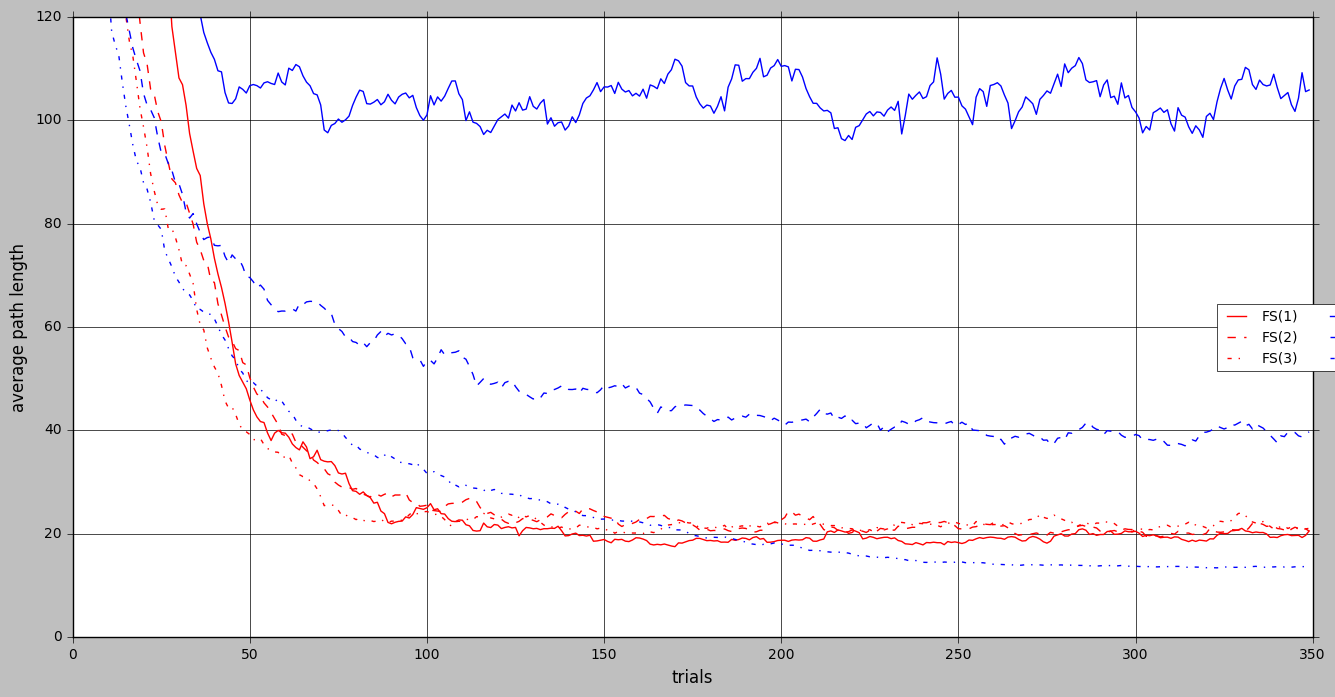

In [32]:
dr.plt.style.use('grayscale')
env_folder = medium_envs[3] 
print env_folder
print dr.plt.style.available
vizualize_all_stochastisity_RL_vs_FS(env_folder, xlim=(0,350), ylim=(0,120), **base_plot_params)

###Динамика изменения числа вторичных фс

In [33]:
def get_results_of_all_stoch_types(folder, files_template):
    folders = [folder + "/" + type_name for type_id, type_name in stoch_types.iteritems()]
    print folders
    return cumulative_load_results(folders, files_template, xrange(1, 11))



['../results/erdos_renyi/n400_p0.015/stochasticenvironment', '../results/erdos_renyi/n400_p0.015/changestatestochasticityenv', '../results/erdos_renyi/n400_p0.015/markovenvironment']
['../results/erdos_renyi/n400_p0.015/stochasticenvironment', '../results/erdos_renyi/n400_p0.015/changestatestochasticityenv', '../results/erdos_renyi/n400_p0.015/markovenvironment']
['../results/torus/10x10_other/stochasticenvironment', '../results/torus/10x10_other/changestatestochasticityenv', '../results/torus/10x10_other/markovenvironment']
['../results/torus/10x10_other/stochasticenvironment', '../results/torus/10x10_other/changestatestochasticityenv', '../results/torus/10x10_other/markovenvironment']
avrg steps last 50 trials =  10.245


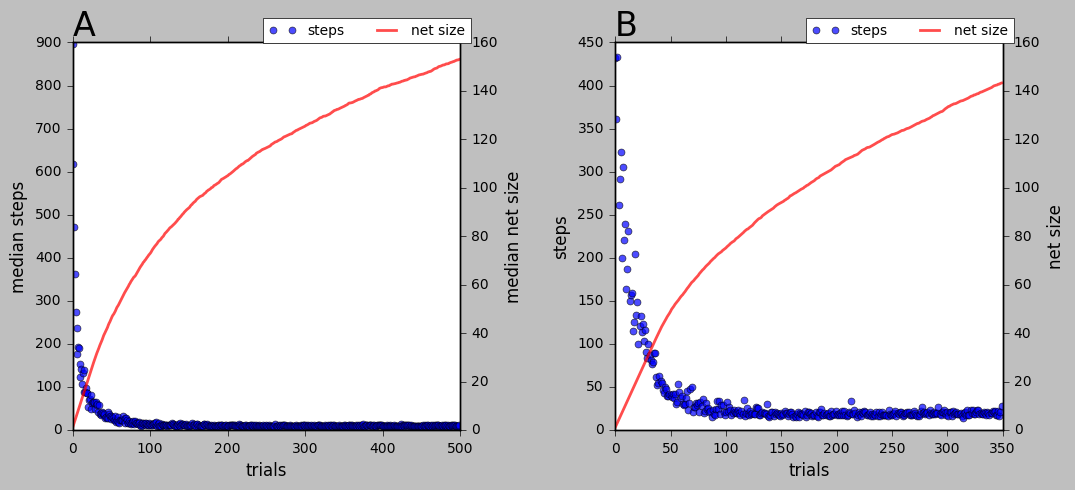

median steps last 50 trials for given run=  8.0
len of average steps:  500
average steps for trials[episodes-50:episodes] =  10.245


In [34]:
env_config1 = big_envs[0]
fs_steps1 = get_results_of_all_stoch_types(env_config1, "all_paths_{0}.json")
fs_secs1 = get_results_of_all_stoch_types(env_config1, "all_secondary_{0}.json")

episodes = 500

env_config2 = medium_envs[3]
fs_steps2 = get_results_of_all_stoch_types(env_config2, "all_paths_{0}.json")
fs_secs2 = get_results_of_all_stoch_types(env_config2, "all_secondary_{0}.json")


avrg_paths = dr.np.average(median_by_trial(fs_steps1),axis=0)
print 'avrg steps last 50 trials = ', dr.np.average(avrg_paths[-50:])

fig, (ax,ax11) = dr.plt.subplots(ncols=2, figsize=(12, 5))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.4)

#ax = fig.add_subplot(111, xlabel="trials", ylabel="average steps")
#везде добавил ограничение в 250 как в оригинальном графике

ax.grid(0)
ax.set_ylabel('median steps')
ax.set_xlabel('trials')
ax.set_title('A', loc='left', fontsize=24)
ax.set_xlim(0,500)

pt, = ax.plot(avrg_paths[:episodes], 'o', markersize=5, color='blue', alpha=0.7) #обновлено на новые данные
ax2 = ax.twinx()
fs, = ax2.plot(dr.np.average(median_by_trial(fs_secs1),  # обновлено на новые данные
                              axis=0)[:episodes],  '-', linewidth=2, color='red', alpha=0.7)
ax2.set_ylabel('median net size')
ax2.grid(0)
fig.legend(handles=[pt,fs], labels=['steps','net size'], ncol=2,
           loc="lower right", bbox_to_anchor=(0.3983, 0.88), 
           fontsize='medium', shadow=0)
           #loc='lower right', bbox_to_anchor=(0.22, 0.98), fontsize='medium', shadow=0)

run=11 # 11, 30(conv), 81, 90
#ax11 = fig.add_subplot(221, xlabel="trials", ylabel="steps")
ax11.grid(0)

ax11.set_ylabel('steps')
ax11.set_xlabel('trials')
ax11.set_title('B', loc='left', fontsize=24)
#pt2, = ax11.plot(fs_steps[run][:episodes], 'o', markersize=5, color='blue', alpha=0.7)
pt2, = ax11.plot(dr.np.average(median_by_trial(fs_steps2),axis=0), 'o', markersize=5, color='blue', alpha=0.7)
ax21 = ax11.twinx()
#fs2, = ax21.plot(fs_secs[run][:episodes],  '-', linewidth=2, color='red', alpha=0.7)
fs2, = ax21.plot(dr.np.average(median_by_trial(fs_secs2),axis=0),  '-', linewidth=2, color='red', alpha=0.7)
ax21.set_ylabel('net size')
ax21.grid(0)

#ax11.set_xlim(0, 50)
#ax21.set_xlim(0, 50)

fig.legend(handles=[pt2,fs2], labels=['steps','net size'], ncol=2,
           loc='lower right', bbox_to_anchor=(0.8507, 0.88), fontsize='medium', shadow=0)
           #loc='lower center', bbox_to_anchor=(0.72, 0.98), fontsize='medium', shadow=0)
#dr.plt.savefig("new_fig_2.pdf", bbox_inches='tight')
dr.plt.show()
print 'median steps last 50 trials for given run= ', dr.np.median(fs_steps1[run,-50:])
print 'len of average steps: ', len(avrg_paths)  
print 'average steps for trials[episodes-50:episodes] = ', dr.np.average((avrg_paths[:episodes])[-50:])

### Визуализировать график демонстрирующий результаты FS в пероидической среде.


../results/torus/10x10_other


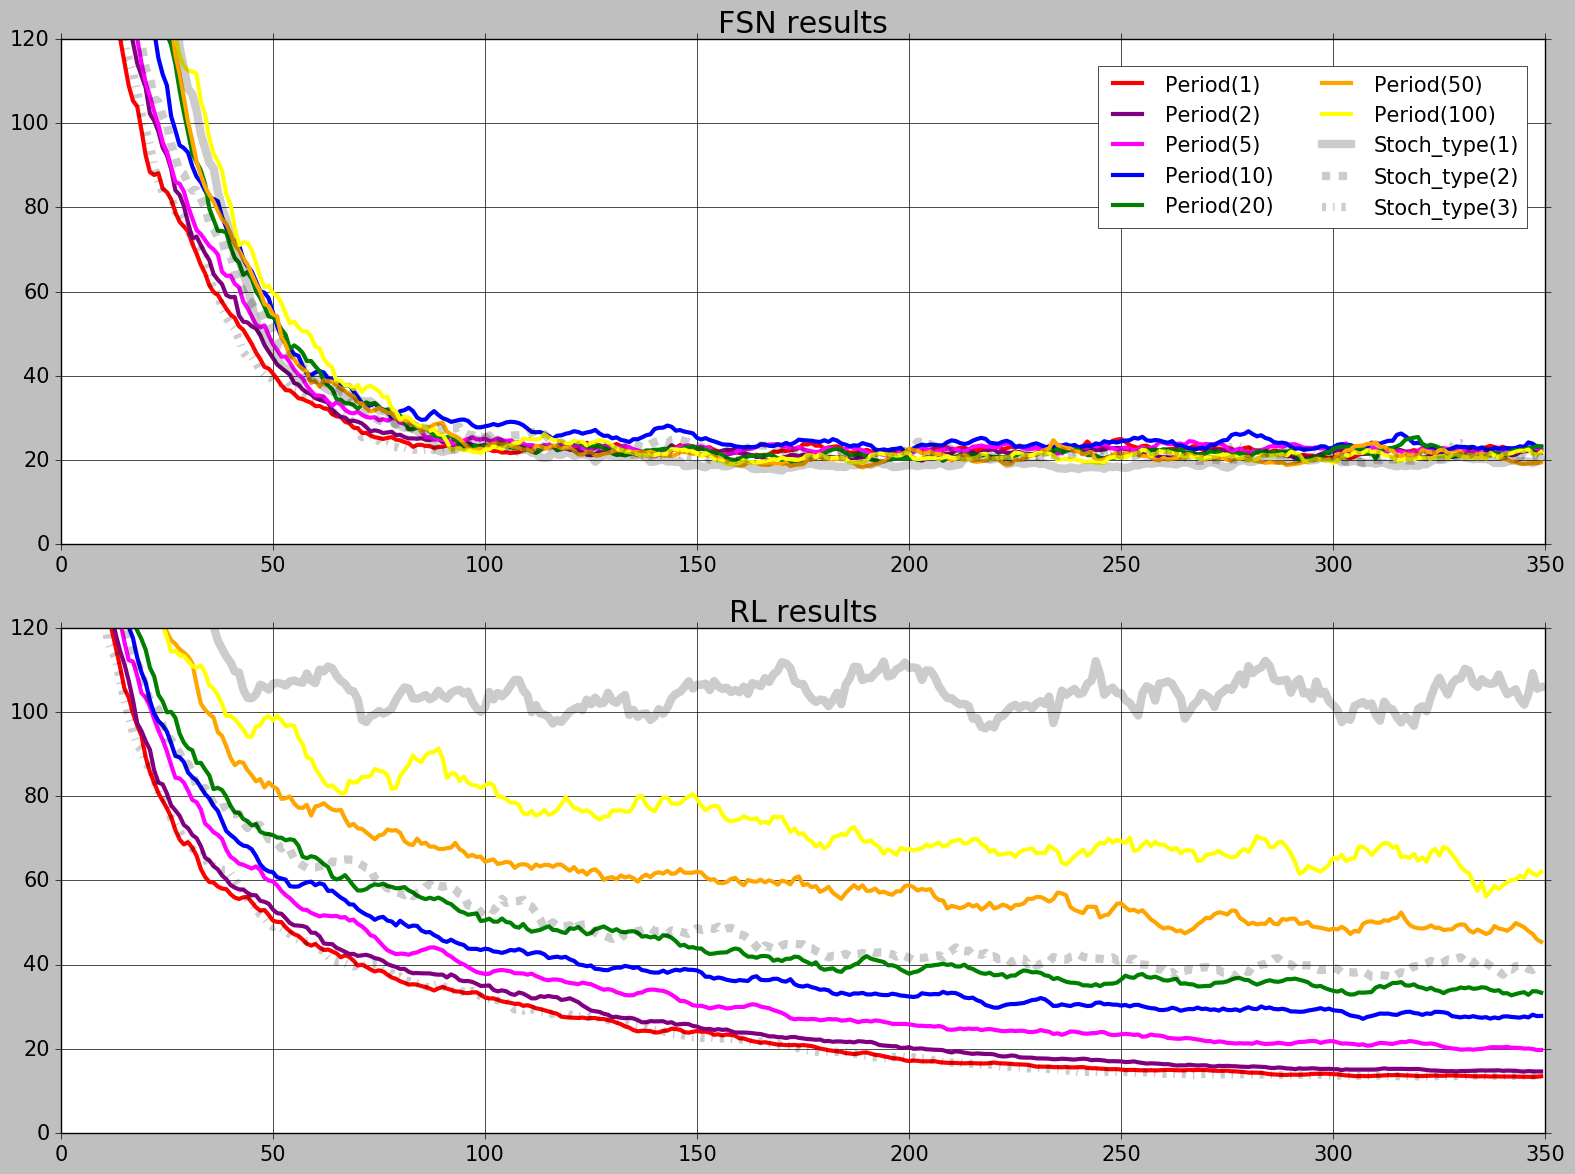

In [35]:
def periodic_folder(period):
    return 'periodicenvironment_{0}'.format(period)

period2color = {
    1: 'red',
    2: 'purple',
    5: 'magenta',
    10: 'blue',
    20: 'green',
    50: 'orange',
    100: 'yellow',
    15000: 'black'
    
}

def periodic_results(folder_with_results, **kwargs):
    #load old data
    fs = {}
    rl = {}
    for k, v in stoch_types.iteritems():
        fs[k] = load_results(folder_with_results + "/" + v + "/all_paths_{0}.json", xrange(1, 11))
        rl[k] = load_results(folder_with_results + "/" + v + "/q-learning_(0.1,0.9, 0.1)_{0}.json", xrange(1, 11))
    
    #load periodic data
    periodic_env = lambda p: 'periodicenvironment_{0}'.format(p)
    periods = [1, 2, 5, 10, 20, 50, 100]
    p_fs = {}
    p_rl = {}
    for p in periods:
        env_folder = folder_with_results + '/' + periodic_env(p)
        p_fs[p] = load_results(env_folder +'/all_paths_{0}.json', xrange(1,11))
        p_rl[p] = load_results(env_folder + "/q-learning_(0.1,0.9, 0.1)_{0}.json", xrange(1, 11))
    
    last_n = 10 # усреднение по последним n значениям внутри одного графика(для сглаживания)
    
    fig = dr.plt.figure(1) 
    ax_fs = fig.add_subplot(211, **kwargs)
    ax_rl = fig.add_subplot(212, **kwargs)
    
    ax_fs.set_title('FSN results')
    ax_rl.set_title('RL results')
    
    h2l = [] #handlers to labels
    
    #FS subplot
    for p in periods:
        handle, = ax_fs.plot(aa(p_fs[p], last_n), color = period2color[p], lw=3)
        h2l.append((handle, "Period({0})".format(p)))  
    for k, v in fs.iteritems():
        handle, = ax_fs.plot(aa(v, last_n), line_styles[k], color = "black", alpha=0.2, lw=6)
        h2l.append((handle, "Stoch_type({0})".format(k)))
    
    #RL subplot
    for p in periods:
        ax_rl.plot(aa(p_rl[p], last_n), color = period2color[p], lw=3)
    for k, v in rl.iteritems():
        ax_rl.plot(aa(v, last_n), line_styles[k], color = "black", alpha=0.2, lw=6)
        
    #Legend
    h, l = zip(*h2l)
    fig.legend(handles=h, labels=l, loc='lower left',
               bbox_to_anchor=(.680, .780),
               ncol=2, fontsize='medium')

    fig.tight_layout()
    dr.plt.show()     
    
env_folder = medium_envs[3]
pylab.rcParams['figure.figsize'] = 16, 12
pylab.rcParams.update({'font.size':15})
print env_folder
periodic_results(env_folder, xlim=(0,350), ylim=(0,120))    

### Результаты модифицированного по аналогии с FSN Q-learning

../results/torus/10x10_other


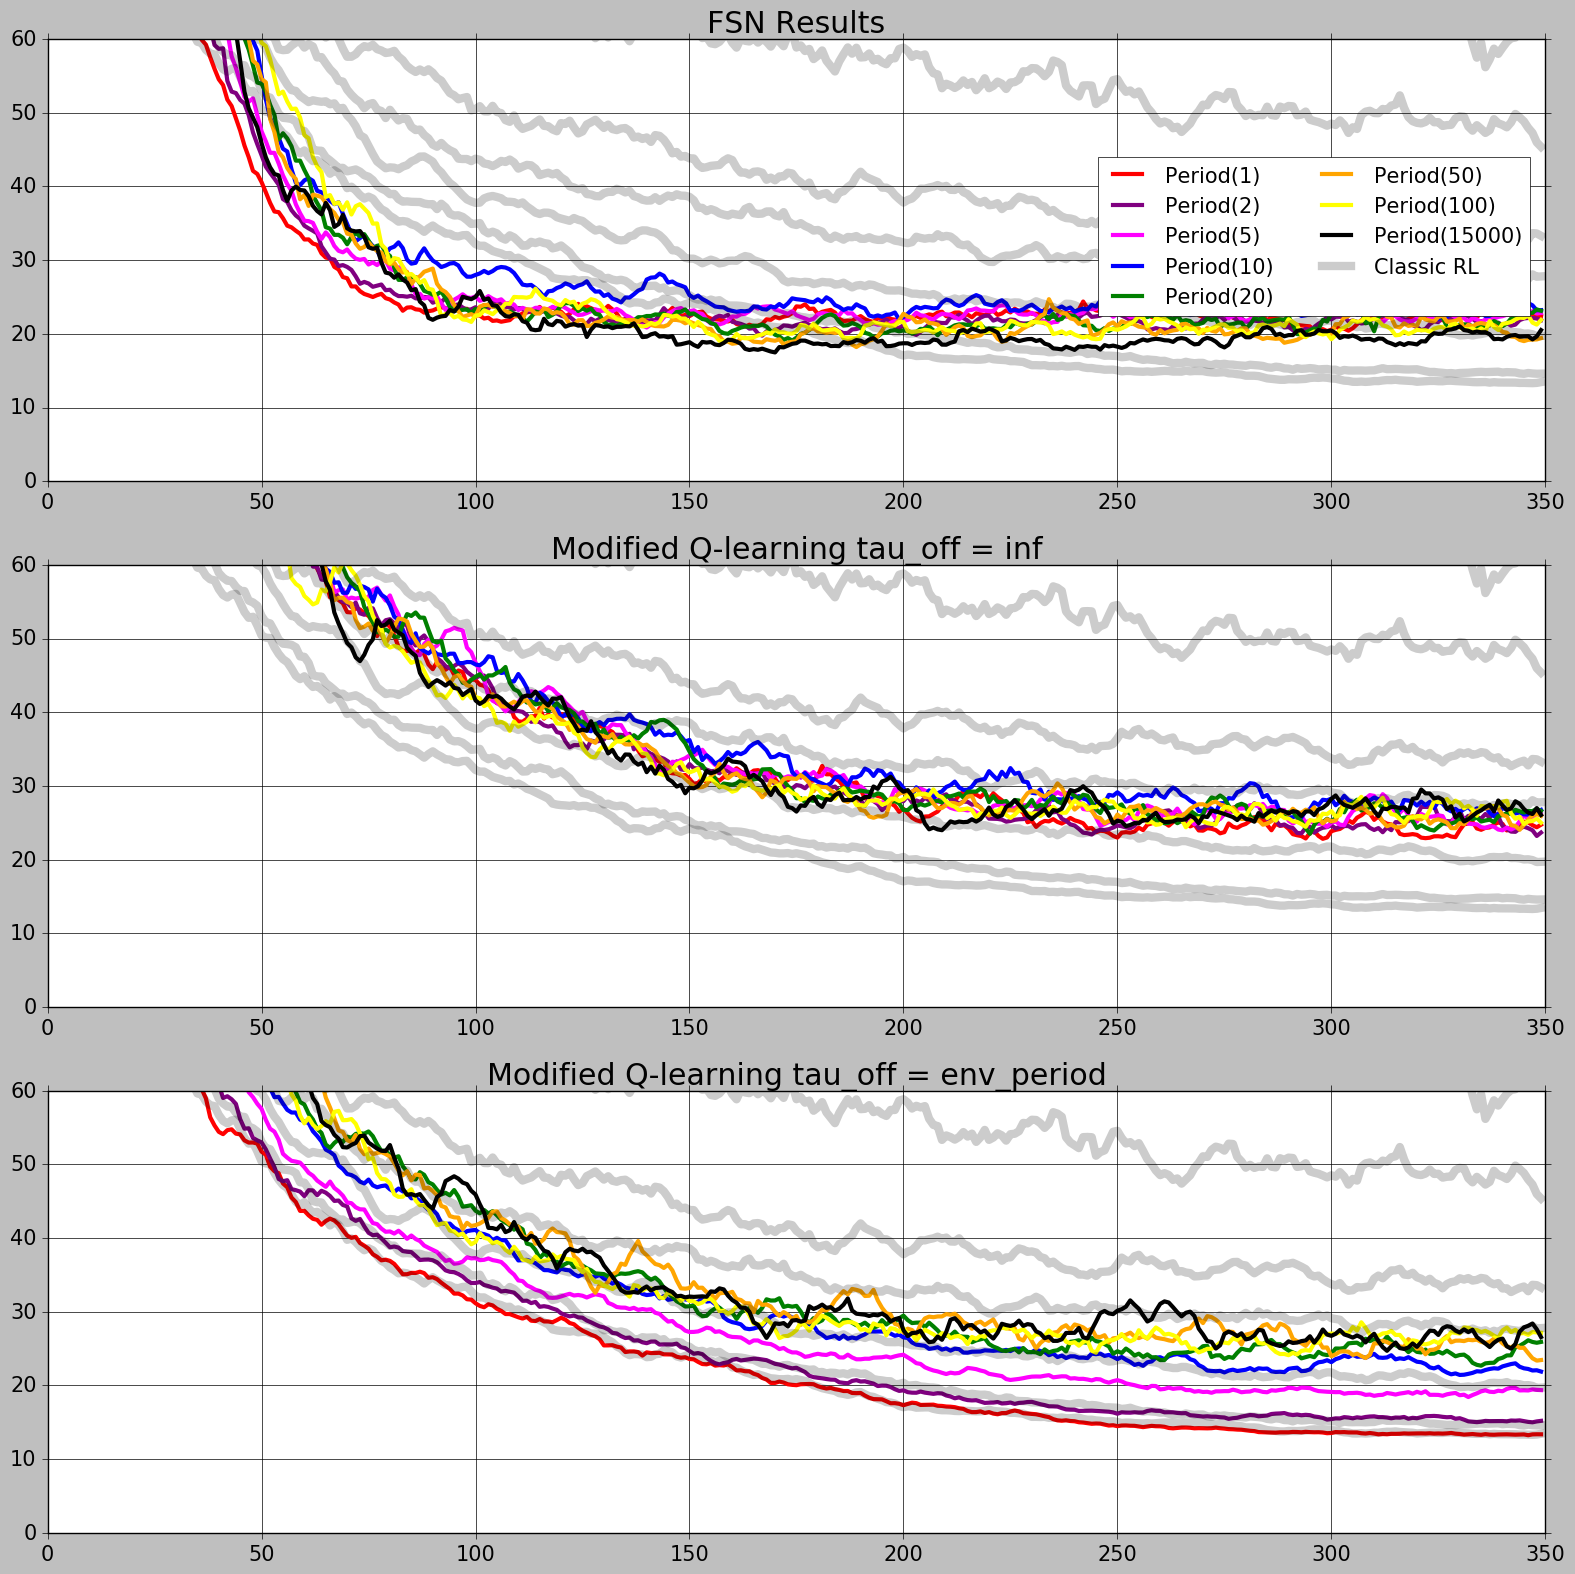

In [36]:
def draw_periodic_q_learning(folder_with_results, **kwargs):
    ids = range(1,11) 
    #load old data
    fs = {}
    rl = {}
    for k, v in stoch_types.iteritems():
        fs[k] = load_results(folder_with_results + "/" + v + "/all_paths_{0}.json", ids)
        rl[k] = load_results(folder_with_results + "/" + v + "/q-learning_(0.1,0.9, 0.1)_{0}.json", ids)
    
    #load periodic data
    periodic_env = lambda p: 'periodicenvironment_{0}'.format(p)
    periods = [1, 2, 5, 10, 20, 50, 100]
    p_fs = {}
    p_rl = {}
    periodic_ql = {
        'same':{},
        'inf': {}
    }
    
    for p in periods:
        env_folder = folder_with_results + '/' + periodic_env(p)
        p_fs[p] = load_results(env_folder +'/all_paths_{0}.json', ids)
        p_rl[p] = load_results(env_folder + "/q-learning_(0.1,0.9, 0.1)_{0}.json", xrange(1, 11))
        periodic_ql['inf'][p] = load_results(env_folder + "/pq_(0.1,0.9,0.1,inf)_{0}.json", ids)
        periodic_ql['same'][p] = load_results(env_folder + "/pq_(0.1,0.9,0.1,same)_{0}.json", ids)
        
    #обновление раз 15000 тоже самое что и обвовление весов между эпизодами
    #тк ограничение на число шагов в эпизоде именно такое
    env_folder = folder_with_results + '/' + periodic_env(15000) 
    periodic_ql['inf'][15000] = load_results(env_folder + "/pq_(0.1,0.9,0.1,inf)_{0}.json", ids)
    periodic_ql['same'][15000] = load_results(env_folder + "/pq_(0.1,0.9,0.1,same)_{0}.json", ids)
    
    last_n = 10 # усреднение по последним n значениям внутри одного графика(для сглаживания)
    
    #p_rl = periodic_ql['same']
    
    fig = dr.plt.figure(1) 
    ax_fsn = fig.add_subplot(311, **kwargs)
    ax_inf = fig.add_subplot(312, **kwargs)
    ax_same = fig.add_subplot(313, **kwargs)
    
    ax_fsn.set_title('FSN Results')
    ax_inf.set_title('Modified Q-learning tau_off = inf')
    ax_same.set_title('Modified Q-learning tau_off = env_period')
    
    h2l = [] #handlers to labels
    
    #FSN
    for p in periods:
        handle, = ax_fsn.plot(aa(p_fs[p], last_n), color = period2color[p], lw=3)
        h2l.append((handle, "Period({0})".format(p)))  
    
    handle, = ax_fsn.plot(aa(fs[1], last_n), color = "black", lw=3)
    h2l.append((handle, "Period(15000)".format(k)))
    
    # periodic Q-lerning
    for p in periods  + [15000]:
        ax_inf.plot(aa(periodic_ql['inf'][p], last_n), color = period2color[p], lw=3)
        ax_same.plot(aa(periodic_ql['same'][p], last_n), color = period2color[p], lw=3)
    
    #фоном на всех трех графиках идут результаты классического Q-learning'а в переодических средах 
    for axis in [ax_fsn, ax_same, ax_inf]:
        for p in periods:
            handle, = axis.plot(aa(p_rl[p], last_n), color = 'black', alpha=0.2, lw=6)

    h2l.append((handle, 'Classic RL'))
    
    #Legend
    h, l = zip(*h2l)
    fig.legend(handles=h, labels=l, loc='lower left',
               bbox_to_anchor=(.680, .780),
               ncol=2, fontsize='medium')

    fig.tight_layout()
    dr.plt.show()     
    
env_folder = medium_envs[3]
pylab.rcParams['figure.figsize'] = 16, 16
pylab.rcParams.update({'font.size':15})
print env_folder
draw_periodic_q_learning(env_folder, xlim=(0,350), ylim=(0,60))    